# Credit_Card_Approval
In the current world providing credit to a person should be carefully done as it has serious impacts on the business.
A bank's credit card approval system should thoroughly be able to find the credit worthiness of a person.
From customers we have to collect data that can be considered as features and these will be the parameters that decide whether he is eligible or not.
If this not done properly credit can reach to wrong hands which can have further impacts.

Here we shall analyze the data thoroughly and create a model that can effectively bring out credit worthiness of a customer.
The model that we are going to prepare is completely based on the dataset provided and it's output shall be useful only
on the same behaviorial customer regions.  

In [4]:
# Import necessary libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [5]:
# loading the dataset
d1=pd.read_csv(r"C:\Users\hp\Downloads\Dataset (5)\Credit_card.csv")
d2=pd.read_csv(r"C:\Users\hp\Downloads\Dataset (5)\Credit_card_label.csv")

Here we have been provided two datasets where one is having certain features based on Ind_ID where as the other has labels based on Ind_ID
So to get that together we can merge to get a single dataset.

In [6]:
# Merging the dataset based Ind_ID
data_raw=pd.merge(d1,d2,how="inner",on="Ind_ID")
data_raw.head()

Ind_ID GENDER Car_Owner Propert_Owner  CHILDREN  Annual_income  \
0  5008827      M         Y             Y         0       180000.0   
1  5009744      F         Y             N         0       315000.0   
2  5009746      F         Y             N         0       315000.0   
3  5009749      F         Y             N         0            NaN   
4  5009752      F         Y             N         0       315000.0   

            Type_Income         EDUCATION Marital_status       Housing_type  \
0             Pensioner  Higher education        Married  House / apartment   
1  Commercial associate  Higher education        Married  House / apartment   
2  Commercial associate  Higher education        Married  House / apartment   
3  Commercial associate  Higher education        Married  House / apartment   
4  Commercial associate  Higher education        Married  House / apartment   

   Birthday_count  Employed_days  Mobile_phone  Work_Phone  Phone  EMAIL_ID  \
0        -18772.0         365243             1           0      0         0   
1        -13557.0           -586             1           1      1         0   
2             NaN           -586             1           1      1         0   
3        -13557.0           -586             1           1      1         0   
4        -13557.0           -586             1           1      1         0   

  Type_Occupation  Family_Members  label  
0             NaN               2      1  
1             NaN               2      1  
2             NaN               2      1  
3             NaN               2      1  
4             NaN               2      1

In [ ]:
'''
Gender: Gender information
Car_owner: Having car or not
Propert_owner: Having property or not
Children: Count of children
Annual income: Annual Income
Type Income: Income type
Education: Education level
Marital status: Marital status
Housing_type: Living style
Birthday_count: Use backward count from current day (0), -1 means yesterday.
Employed_days: Start date of employment. Use backward count from current day (0).
Positive value means, Individual is currently unemployed.
Mobile phone: Any mobile phone
Work phone: Any work phone
Phone: Any phone number
EMAIL ID: Any email ID
Type Occupation: Occupation
Family Members: Family size
Label: O is application approved and I is application rejected.
'''

In [7]:
# let's check the complete details of the dataset
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

We have **1548 records with 19 columns** and it is evident that we have some **missing values** in the dataset for columns like Type_Occupation,Birthday_count,Annual_income etc

In [9]:
# let's check whether we have any duplicates
data_raw.duplicated().unique()

array([False])

From the above query it is clear that we do not have any **duplicating record.**

In [10]:
# let's check the features
data_raw.columns

Index(['Ind_ID', 'GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN',
       'Annual_income', 'Type_Income', 'EDUCATION', 'Marital_status',
       'Housing_type', 'Birthday_count', 'Employed_days', 'Mobile_phone',
       'Work_Phone', 'Phone', 'EMAIL_ID', 'Type_Occupation', 'Family_Members',
       'label'],
      dtype='object')

In [11]:
# To know descriptional statistics of the dataset 
data_raw.describe().T

count          mean            std        min         25%  \
Ind_ID          1548.0  5.078920e+06   41717.587742  5008827.0  5045069.75   
CHILDREN        1548.0  4.127907e-01       0.776691        0.0        0.00   
Annual_income   1525.0  1.913993e+05  113252.997656    33750.0   121500.00   
Birthday_count  1526.0 -1.604034e+04    4229.503202   -24946.0   -19553.00   
Employed_days   1548.0  5.936469e+04  137808.062701   -14887.0    -3174.50   
Mobile_phone    1548.0  1.000000e+00       0.000000        1.0        1.00   
Work_Phone      1548.0  2.080103e-01       0.406015        0.0        0.00   
Phone           1548.0  3.094315e-01       0.462409        0.0        0.00   
EMAIL_ID        1548.0  9.237726e-02       0.289651        0.0        0.00   
Family_Members  1548.0  2.161499e+00       0.947772        1.0        2.00   
label           1548.0  1.130491e-01       0.316755        0.0        0.00   

                      50%         75%        max  
Ind_ID          5078841.5  5115673.00  5150412.0  
CHILDREN              0.0        1.00       14.0  
Annual_income    166500.0   225000.00  1575000.0  
Birthday_count   -15661.5   -12417.00    -7705.0  
Employed_days     -1565.0     -431.75   365243.0  
Mobile_phone          1.0        1.00        1.0  
Work_Phone            0.0        0.00        1.0  
Phone                 0.0        1.00        1.0  
EMAIL_ID              0.0        0.00        1.0  
Family_Members        2.0        3.00       15.0  
label                 0.0        0.00        1.0

In [12]:
# Explore the values in the columns here we can ignore Ind_ID ,identifier 
for i in data_raw.columns[1:]:
    print(i)
    print(data_raw[i].unique())
    print(data_raw[i].value_counts())
    print()

GENDER
['M' 'F' nan]
F    973
M    568
Name: GENDER, dtype: int64

Car_Owner
['Y' 'N']
N    924
Y    624
Name: Car_Owner, dtype: int64

Propert_Owner
['Y' 'N']
Y    1010
N     538
Name: Propert_Owner, dtype: int64

CHILDREN
[ 0  1  2  4  3 14]
0     1091
1      305
2      134
3       16
4        1
14       1
Name: CHILDREN, dtype: int64

Annual_income
[ 180000.   315000.        nan  450000.    90000.   472500.   270000.
  126000.   202500.   157500.   112500.   540000.   292500.   135000.
   76500.   215100.   225000.    67500.   171000.   103500.    99000.
  391500.    65250.    72900.   360000.   256500.   675000.   247500.
   85500.   121500.   130500.   211500.    81000.    72000.   148500.
  162000.   195750.   585000.   216000.   306000.   108000.    63000.
   45000.   337500.   131400.   117000.   445500.   234000.  1575000.
  144000.    67050.    73350.   193500.   900000.    94500.   198000.
   54000.   166500.   167400.   153000.   423000.   243000.   283500.
  252000.   4950

For Columns like Children,Family_members,Employed_days we could see some **outliers.**

Employed_days and Birthday_count is in days we shall convert that in years for making analysis more clear

Ind_ID and Mobile_phone can be deleted as Ind_ID is just an identifier and Mobile_phone is having Mobile_phone
**1::1548**  for all records hence no effect on the data,it seems.

In [14]:
# Removing Ind_ID and Mobile_phone columns from the dataset and creating data
data=data_raw.drop(columns=["Ind_ID","Mobile_phone"],axis=1)
data.shape

(1548, 17)

Here it is better to convert days to years for work_days and birthday_count, So data will give more clear information

In [16]:
# Converting birthday_count and Employed_days to years 
data['Work_years']=round(data['Employed_days']/365,2)
data['Age']=round(data['Birthday_count']/365,2)
data.head()

GENDER Car_Owner Propert_Owner  CHILDREN  Annual_income  \
0      M         Y             Y         0       180000.0   
1      F         Y             N         0       315000.0   
2      F         Y             N         0       315000.0   
3      F         Y             N         0            NaN   
4      F         Y             N         0       315000.0   

            Type_Income         EDUCATION Marital_status       Housing_type  \
0             Pensioner  Higher education        Married  House / apartment   
1  Commercial associate  Higher education        Married  House / apartment   
2  Commercial associate  Higher education        Married  House / apartment   
3  Commercial associate  Higher education        Married  House / apartment   
4  Commercial associate  Higher education        Married  House / apartment   

   Birthday_count  Employed_days  Work_Phone  Phone  EMAIL_ID Type_Occupation  \
0        -18772.0         365243           0      0         0             NaN   
1        -13557.0           -586           1      1         0             NaN   
2             NaN           -586           1      1         0             NaN   
3        -13557.0           -586           1      1         0             NaN   
4        -13557.0           -586           1      1         0             NaN   

   Family_Members  label  Work_years    Age  
0               2      1     1000.67 -51.43  
1               2      1       -1.61 -37.14  
2               2      1       -1.61    NaN  
3               2      1       -1.61 -37.14  
4               2      1       -1.61 -37.14

In [17]:
# Since two new columns created with that birthday_count and Employed_days, We should remove those from the dataset
data=data.drop(columns=["Birthday_count","Employed_days"],axis=1)
data.head()

GENDER Car_Owner Propert_Owner  CHILDREN  Annual_income  \
0      M         Y             Y         0       180000.0   
1      F         Y             N         0       315000.0   
2      F         Y             N         0       315000.0   
3      F         Y             N         0            NaN   
4      F         Y             N         0       315000.0   

            Type_Income         EDUCATION Marital_status       Housing_type  \
0             Pensioner  Higher education        Married  House / apartment   
1  Commercial associate  Higher education        Married  House / apartment   
2  Commercial associate  Higher education        Married  House / apartment   
3  Commercial associate  Higher education        Married  House / apartment   
4  Commercial associate  Higher education        Married  House / apartment   

   Work_Phone  Phone  EMAIL_ID Type_Occupation  Family_Members  label  \
0           0      0         0             NaN               2      1   
1           1      1         0             NaN               2      1   
2           1      1         0             NaN               2      1   
3           1      1         0             NaN               2      1   
4           1      1         0             NaN               2      1   

   Work_years    Age  
0     1000.67 -51.43  
1       -1.61 -37.14  
2       -1.61    NaN  
3       -1.61 -37.14  
4       -1.61 -37.14

In [19]:
data[['Annual_income','Age','Work_years','CHILDREN','Family_Members']].corr()

Annual_income       Age  Work_years  CHILDREN  Family_Members
Annual_income        1.000000  0.111639   -0.160175  0.078497        0.050957
Age                  0.111639  1.000000   -0.619032  0.279715        0.266528
Work_years          -0.160175 -0.619032    1.000000 -0.219095       -0.238705
CHILDREN             0.078497  0.279715   -0.219095  1.000000        0.890248
Family_Members       0.050957  0.266528   -0.238705  0.890248        1.000000

In [21]:
data[['Annual_income','Age','Work_years','CHILDREN','Family_Members']].describe()

Annual_income          Age   Work_years     CHILDREN  Family_Members
count   1.525000e+03  1526.000000  1548.000000  1548.000000     1548.000000
mean    1.913993e+05   -43.946094   162.643676     0.412791        2.161499
std     1.132530e+05    11.587803   377.557937     0.776691        0.947772
min     3.375000e+04   -68.350000   -40.790000     0.000000        1.000000
25%     1.215000e+05   -53.567500    -8.695000     0.000000        2.000000
50%     1.665000e+05   -42.905000    -4.285000     0.000000        2.000000
75%     2.250000e+05   -34.020000    -1.180000     1.000000        3.000000
max     1.575000e+06   -21.110000  1000.670000    14.000000       15.000000

In [23]:
f=px.box(data,y='Age',width=400,height=300)
f.show()

**Birthday_count** which is now in years has a median age of 43 and the dataset has age ranging from 20 to 69.

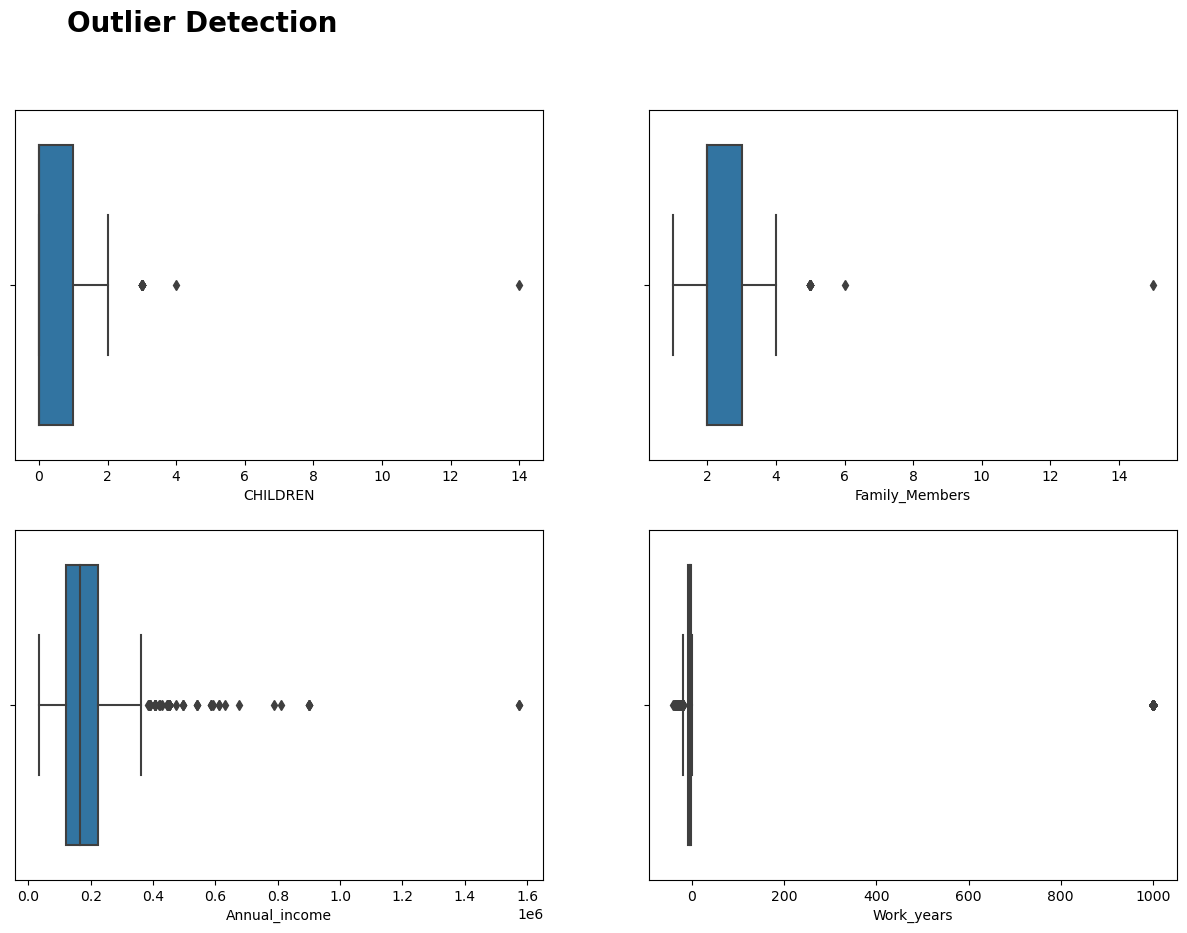

In [24]:
fig,axes=plt.subplots(2,2,figsize=(15,10))
fig.suptitle(t="Outlier Detection",x=0.25,size=20,fontweight ="bold")
sns.boxplot(ax=axes[0,0],data=data,x='CHILDREN')
sns.boxplot(ax=axes[0,1],data=data,x='Family_Members')
sns.boxplot(ax=axes[1,0],data=data,x='Annual_income')
sns.boxplot(ax=axes[1,1],data=data,x='Work_years')

plt.show()

**Work_years** which is now in years cannot be **1000 years** that is fully wrong. This is not just an Outlier anything beyond 20-30 years should be considered as wrong.

**Both CHILDREN and Family_Members** having count **more than 10** should be considered as an outlier.

In [27]:
# let's analyze the 1000 years
data[data.Work_years>1000]

GENDER Car_Owner Propert_Owner  CHILDREN  Annual_income Type_Income  \
0         M         Y             Y         0       180000.0   Pensioner   
7         F         N             N         0       180000.0   Pensioner   
26        F         N             Y         0       112500.0   Pensioner   
27        F         N             Y         0            NaN   Pensioner   
31        F         N             Y         0       112500.0   Pensioner   
...     ...       ...           ...       ...            ...         ...   
1509      F         Y             Y         0       157500.0   Pensioner   
1511      F         N             Y         0       216000.0   Pensioner   
1514      F         N             N         0        69750.0   Pensioner   
1525      F         Y             Y         0       175500.0   Pensioner   
1531      F         N             N         0       157500.0   Pensioner   

                          EDUCATION        Marital_status  \
0                  Higher education               Married   
7     Secondary / secondary special               Married   
26    Secondary / secondary special               Married   
27    Secondary / secondary special               Married   
31    Secondary / secondary special               Married   
...                             ...                   ...   
1509  Secondary / secondary special                 Widow   
1511               Higher education  Single / not married   
1514  Secondary / secondary special                 Widow   
1525               Higher education               Married   
1531  Secondary / secondary special             Separated   

             Housing_type  Work_Phone  Phone  EMAIL_ID Type_Occupation  \
0       House / apartment           0      0         0             NaN   
7       House / apartment           0      0         0             NaN   
26      House / apartment           0      1         0             NaN   
27      House / apartment           0      1         0             NaN   
31      House / apartment           0      1         1             NaN   
...                   ...         ...    ...       ...             ...   
1509    House / apartment           0      0         0             NaN   
1511    House / apartment           0      0         0             NaN   
1514  Municipal apartment           0      1         0             NaN   
1525    House / apartment           0      1         0             NaN   
1531    House / apartment           0      0         0             NaN   

      Family_Members  label  Work_years    Age  
0                  2      1     1000.67 -51.43  
7                  2      1     1000.67 -60.64  
26                 2      1     1000.67 -59.81  
27                 2      1     1000.67 -59.81  
31                 2      1     1000.67 -59.93  
...              ...    ...         ...    ...  
1509               1      0     1000.67 -55.98  
1511               1      0     1000.67 -55.86  
1514               1      0     1000.67 -60.24  
1525               2      0     1000.67 -60.48  
1531               1      0     1000.67 -65.88  

[261 rows x 17 columns]

In [28]:
# let's check the Type_income of all those having 1000 years
print(data[data.Work_years>1000].Type_Income.unique())
data[data.Work_years>1000].Type_Income.value_counts()

['Pensioner']


Pensioner    261
Name: Type_Income, dtype: int64

All these are **Pensioners** so it should have been a positive number but never 1000 years

The record having Children 14

In [80]:
data[data.CHILDREN>10]

GENDER Car_Owner Propert_Owner  CHILDREN  Annual_income Type_Income  \
565      M         Y             Y        14       225000.0     Working   

                         EDUCATION Marital_status       Housing_type  \
565  Secondary / secondary special      Separated  House / apartment   

     Birthday_count  Employed_days  Work_Phone  Phone  EMAIL_ID  \
565      -48.641096      -4.627397           0      0         0   

    Type_Occupation  Family_Members  label  
565         Drivers              15      0

So here **Children 14 and Family_members 15** happens in same record which is clearly an outlier. So we shall remove the same.

In [30]:
data.Annual_income.sort_values(ascending=False)

233     1575000.0
211     1575000.0
811      900000.0
686      900000.0
1068     900000.0
          ...    
1011          NaN
1263          NaN
1299          NaN
1386          NaN
1543          NaN
Name: Annual_income, Length: 1548, dtype: float64

In [85]:
data[data.Annual_income>400000]

GENDER Car_Owner Propert_Owner  CHILDREN  Annual_income  \
8         M         Y             Y         1       450000.0   
9         M         Y             Y         1       450000.0   
10        M         Y             Y         1       450000.0   
14        M         N             N         1       472500.0   
25        F         Y             Y         0       540000.0   
...     ...       ...           ...       ...            ...   
1457      M         Y             Y         0       405000.0   
1467      M         Y             Y         0       450000.0   
1479      F         N             N         0       450000.0   
1495      F         N             Y         0       405000.0   
1538      F         Y             N         0       450000.0   

               Type_Income                      EDUCATION  \
8     Commercial associate  Secondary / secondary special   
9                Pensioner  Secondary / secondary special   
10    Commercial associate  Secondary / secondary special   
14               Pensioner               Higher education   
25    Commercial associate               Higher education   
...                    ...                            ...   
1457               Working               Higher education   
1467  Commercial associate               Higher education   
1479               Working               Higher education   
1495  Commercial associate  Secondary / secondary special   
1538             Pensioner               Higher education   

            Marital_status       Housing_type  Birthday_count  Employed_days  \
8                  Married  House / apartment      -49.789041      -1.857534   
9                  Married  House / apartment      -49.789041      -1.857534   
10    Single / not married  House / apartment      -49.789041      -1.857534   
14                 Married       With parents      -24.402740      -2.501370   
25                 Married  House / apartment      -43.019178      -0.506849   
...                    ...                ...             ...            ...   
1457               Married  House / apartment      -32.117808      -5.013699   
1467  Single / not married  House / apartment      -29.690411      -1.610959   
1479               Married  House / apartment      -30.361644      -9.208219   
1495               Married  House / apartment      -47.745205     -13.353425   
1538               Married  House / apartment      -54.200000     -15.126027   

      Work_Phone  Phone  EMAIL_ID Type_Occupation  Family_Members  label  
8              0      1         1      Core staff               3      1  
9              0      1         1      Core staff               3      1  
10             0      1         1      Core staff               1      1  
14             0      0         1             NaN               3      1  
25             0      1         0             NaN               2      1  
...          ...    ...       ...             ...             ...    ...  
1457           1      0         1             NaN               2      0  
1467           0      0         1     Sales staff               1      0  
1479           0      0         0     Sales staff               2      0  
1495           0      0         1     Sales staff               2      0  
1538           1      1         0        Managers               2      0  

[66 rows x 17 columns]

In [86]:
data[data.Annual_income>400000].Type_Occupation.unique()

array(['Core staff', nan, 'Managers', 'Security staff', 'Laborers',
       'Private service staff', 'Accountants', 'Drivers', 'Sales staff',
       'High skill tech staff', 'Cooking staff'], dtype=object)

In [87]:
data[data.Annual_income>400000].Type_Occupation.value_counts()

Managers                 20
Core staff               10
Drivers                   5
Sales staff               4
Laborers                  3
Security staff            2
Accountants               2
High skill tech staff     2
Private service staff     1
Cooking staff             1
Name: Type_Occupation, dtype: int64

In [ ]:
Yes Value wise these are outliers but Managers can have huge salary compared to others

In [88]:
data[data.Annual_income>1000000].Type_Occupation.value_counts()

Managers    2
Name: Type_Occupation, dtype: int64

In [89]:
data[data.Annual_income>1000000]

GENDER Car_Owner Propert_Owner  CHILDREN  Annual_income  \
211      F         Y             Y         1      1575000.0   
233      F         Y             Y         1      1575000.0   

              Type_Income         EDUCATION        Marital_status  \
211  Commercial associate  Higher education  Single / not married   
233  Commercial associate  Higher education  Single / not married   

          Housing_type  Birthday_count  Employed_days  Work_Phone  Phone  \
211  House / apartment      -27.786301      -6.791781           0      0   
233  House / apartment      -27.786301      -6.791781           0      0   

     EMAIL_ID Type_Occupation  Family_Members  label  
211         0        Managers               2      0  
233         0        Managers               2      0

In [92]:
data[(data.Marital_status=='Single / not married')].CHILDREN.unique()

array([1, 0, 2], dtype=int64)

<Axes: xlabel='Annual_income', ylabel='Count'>

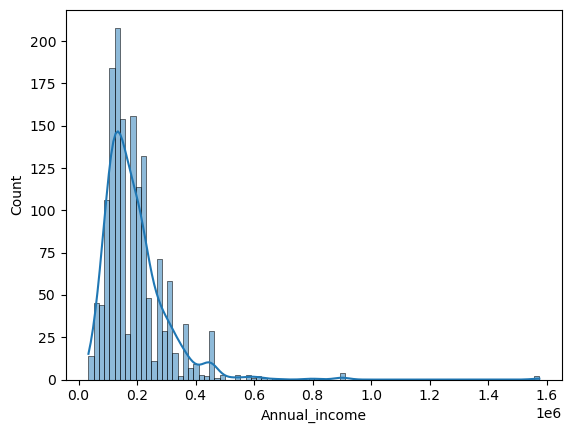

In [94]:
sns.histplot(data=data,x='Annual_income',kde=True)

In [107]:
len(data[data.Annual_income>400000])

66

In [31]:
data2=data.copy(deep=True)

In [32]:
data2.shape

(1548, 17)

In [33]:
data2[data2.Annual_income>400000].index

Int64Index([   8,    9,   10,   14,   25,   29,   39,   95,  150,  151,  153,
             154,  169,  170,  171,  188,  204,  211,  233,  242,  274,  278,
             340,  355,  378,  385,  388,  393,  412,  515,  554,  557,  568,
             573,  587,  622,  684,  686,  777,  811,  884,  885,  908,  912,
             962, 1024, 1053, 1055, 1068, 1076, 1111, 1121, 1175, 1190, 1208,
            1287, 1325, 1333, 1355, 1407, 1430, 1457, 1467, 1479, 1495, 1538],
           dtype='int64')

In [34]:
# Removing Annual_income records that are 66
data2.drop(data2[data2.Annual_income>400000].index,inplace=True,axis=0)
data2.shape

(1482, 17)

In [35]:
data2.CHILDREN.value_counts()

0     1061
1      276
2      127
3       16
4        1
14       1
Name: CHILDREN, dtype: int64

In [36]:
data2.drop(data2[data2.CHILDREN>3].index,inplace=True,axis=0)
data2.shape

(1480, 17)

In [40]:
data2.isnull().sum()
data2[data2.Work_years>1000]

GENDER Car_Owner Propert_Owner  CHILDREN  Annual_income Type_Income  \
0         M         Y             Y         0       180000.0   Pensioner   
7         F         N             N         0       180000.0   Pensioner   
26        F         N             Y         0       112500.0   Pensioner   
27        F         N             Y         0            NaN   Pensioner   
31        F         N             Y         0       112500.0   Pensioner   
...     ...       ...           ...       ...            ...         ...   
1509      F         Y             Y         0       157500.0   Pensioner   
1511      F         N             Y         0       216000.0   Pensioner   
1514      F         N             N         0        69750.0   Pensioner   
1525      F         Y             Y         0       175500.0   Pensioner   
1531      F         N             N         0       157500.0   Pensioner   

                          EDUCATION        Marital_status  \
0                  Higher education               Married   
7     Secondary / secondary special               Married   
26    Secondary / secondary special               Married   
27    Secondary / secondary special               Married   
31    Secondary / secondary special               Married   
...                             ...                   ...   
1509  Secondary / secondary special                 Widow   
1511               Higher education  Single / not married   
1514  Secondary / secondary special                 Widow   
1525               Higher education               Married   
1531  Secondary / secondary special             Separated   

             Housing_type  Work_Phone  Phone  EMAIL_ID Type_Occupation  \
0       House / apartment           0      0         0             NaN   
7       House / apartment           0      0         0             NaN   
26      House / apartment           0      1         0             NaN   
27      House / apartment           0      1         0             NaN   
31      House / apartment           0      1         1             NaN   
...                   ...         ...    ...       ...             ...   
1509    House / apartment           0      0         0             NaN   
1511    House / apartment           0      0         0             NaN   
1514  Municipal apartment           0      1         0             NaN   
1525    House / apartment           0      1         0             NaN   
1531    House / apartment           0      0         0             NaN   

      Family_Members  label  Work_years    Age  
0                  2      1     1000.67 -51.43  
7                  2      1     1000.67 -60.64  
26                 2      1     1000.67 -59.81  
27                 2      1     1000.67 -59.81  
31                 2      1     1000.67 -59.93  
...              ...    ...         ...    ...  
1509               1      0     1000.67 -55.98  
1511               1      0     1000.67 -55.86  
1514               1      0     1000.67 -60.24  
1525               2      0     1000.67 -60.48  
1531               1      0     1000.67 -65.88  

[256 rows x 17 columns]

In [43]:
data2[(data2.Type_Income=='Pensioner')&(data2.Work_years<1000)]

GENDER Car_Owner Propert_Owner  CHILDREN  Annual_income Type_Income  \
5      NaN         Y             N         0       315000.0   Pensioner   
19       M         N             Y         0        90000.0   Pensioner   
45       F         N             Y         1       157500.0   Pensioner   
126      M         Y             Y         0       211500.0   Pensioner   
174      F         N             Y         0       157500.0   Pensioner   

                         EDUCATION        Marital_status       Housing_type  \
5                 Higher education               Married  House / apartment   
19   Secondary / secondary special               Married  House / apartment   
45   Secondary / secondary special  Single / not married  House / apartment   
126  Secondary / secondary special               Married  House / apartment   
174               Higher education               Married  House / apartment   

     Work_Phone  Phone  EMAIL_ID     Type_Occupation  Family_Members  label  \
5             1      1         0                 NaN               2      1   
19            0      0         1                 NaN               2      1   
45            0      1         0  Low-skill Laborers               3      1   
126           0      0         0          Core staff               2      1   
174           0      1         1      Medicine staff               2      1   

     Work_years    Age  
5         -1.61 -37.14  
19        -4.50 -51.68  
45        -6.22 -42.37  
126      -20.69 -41.22  
174       -3.63 -33.94

In [44]:
data2[(data2.Work_years>1000)]

GENDER Car_Owner Propert_Owner  CHILDREN  Annual_income Type_Income  \
0         M         Y             Y         0       180000.0   Pensioner   
7         F         N             N         0       180000.0   Pensioner   
26        F         N             Y         0       112500.0   Pensioner   
27        F         N             Y         0            NaN   Pensioner   
31        F         N             Y         0       112500.0   Pensioner   
...     ...       ...           ...       ...            ...         ...   
1509      F         Y             Y         0       157500.0   Pensioner   
1511      F         N             Y         0       216000.0   Pensioner   
1514      F         N             N         0        69750.0   Pensioner   
1525      F         Y             Y         0       175500.0   Pensioner   
1531      F         N             N         0       157500.0   Pensioner   

                          EDUCATION        Marital_status  \
0                  Higher education               Married   
7     Secondary / secondary special               Married   
26    Secondary / secondary special               Married   
27    Secondary / secondary special               Married   
31    Secondary / secondary special               Married   
...                             ...                   ...   
1509  Secondary / secondary special                 Widow   
1511               Higher education  Single / not married   
1514  Secondary / secondary special                 Widow   
1525               Higher education               Married   
1531  Secondary / secondary special             Separated   

             Housing_type  Work_Phone  Phone  EMAIL_ID Type_Occupation  \
0       House / apartment           0      0         0             NaN   
7       House / apartment           0      0         0             NaN   
26      House / apartment           0      1         0             NaN   
27      House / apartment           0      1         0             NaN   
31      House / apartment           0      1         1             NaN   
...                   ...         ...    ...       ...             ...   
1509    House / apartment           0      0         0             NaN   
1511    House / apartment           0      0         0             NaN   
1514  Municipal apartment           0      1         0             NaN   
1525    House / apartment           0      1         0             NaN   
1531    House / apartment           0      0         0             NaN   

      Family_Members  label  Work_years    Age  
0                  2      1     1000.67 -51.43  
7                  2      1     1000.67 -60.64  
26                 2      1     1000.67 -59.81  
27                 2      1     1000.67 -59.81  
31                 2      1     1000.67 -59.93  
...              ...    ...         ...    ...  
1509               1      0     1000.67 -55.98  
1511               1      0     1000.67 -55.86  
1514               1      0     1000.67 -60.24  
1525               2      0     1000.67 -60.48  
1531               1      0     1000.67 -65.88  

[256 rows x 17 columns]

In [46]:
data2[data2.Work_years>1000].index

Int64Index([   0,    7,   26,   27,   31,   37,   41,   42,   43,   64,
            ...
            1485, 1497, 1499, 1501, 1508, 1509, 1511, 1514, 1525, 1531],
           dtype='int64', length=256)

In [47]:
# Removing Work_years>1000 records 
data2.drop(data2[data2.Work_years>1000].index,inplace=True,axis=0)
data2.shape

(1224, 17)

In [49]:
data2.isnull().sum()/len(data2)*100

GENDER              0.326797
Car_Owner           0.000000
Propert_Owner       0.000000
CHILDREN            0.000000
Annual_income       1.552288
Type_Income         0.000000
EDUCATION           0.000000
Marital_status      0.000000
Housing_type        0.000000
Work_Phone          0.000000
Phone               0.000000
EMAIL_ID            0.000000
Type_Occupation    17.647059
Family_Members      0.000000
label               0.000000
Work_years          0.000000
Age                 1.388889
dtype: float64

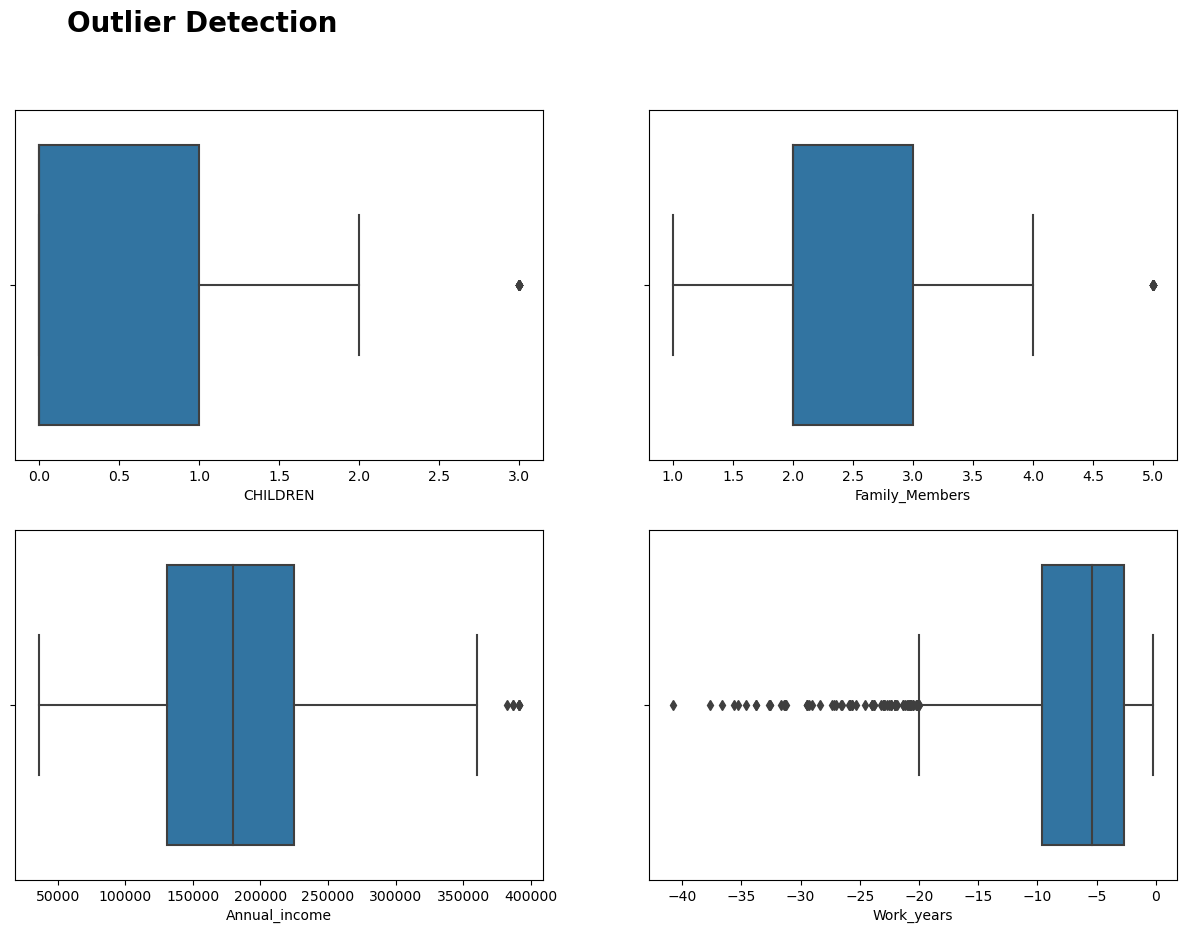

In [51]:
fig,axes=plt.subplots(2,2,figsize=(15,10))
fig.suptitle(t="Outlier Detection",x=0.25,size=20,fontweight ="bold")
sns.boxplot(ax=axes[0,0],data=data2,x='CHILDREN')
sns.boxplot(ax=axes[0,1],data=data2,x='Family_Members')
sns.boxplot(ax=axes[1,0],data=data2,x='Annual_income')
sns.boxplot(ax=axes[1,1],data=data2,x='Work_years')

plt.show()

In [52]:
len(data2[data2.Work_years<-19])

91

In [53]:
data2.Work_years.describe()

count    1224.000000
mean       -7.372034
std         6.642760
min       -40.790000
25%        -9.602500
50%        -5.405000
75%        -2.677500
max        -0.200000
Name: Work_years, dtype: float64

In [55]:
f=px.box(data2,x='Work_years')
f.show()

In [58]:
data2.shape

(1224, 17)

In [59]:
len(data2[data2.Work_years<-20].index)

77

In [60]:
# Removing Work_years>1000 records 
data2.drop(data2[data2.Work_years<-20].index,inplace=True,axis=0)
data2.shape

(1147, 17)

In [62]:
f=px.box(data2,x='Work_years',width=400,height=300)
f.show()

In [63]:
data2.shape

(1147, 17)

In [65]:
data2.Age.sort_values()

760    -65.33
344    -64.48
1223   -64.00
859    -64.00
1312   -63.95
        ...  
991       NaN
1101      NaN
1415      NaN
1446      NaN
1541      NaN
Name: Age, Length: 1147, dtype: float64

In [66]:
data2.Age.sort_values(ascending=False)

759    -21.11
744    -22.44
467    -22.59
1264   -22.67
939    -22.75
        ...  
991       NaN
1101      NaN
1415      NaN
1446      NaN
1541      NaN
Name: Age, Length: 1147, dtype: float64

In [67]:
data2[data2.Age>0]

Empty DataFrame
Columns: [GENDER, Car_Owner, Propert_Owner, CHILDREN, Annual_income, Type_Income, EDUCATION, Marital_status, Housing_type, Work_Phone, Phone, EMAIL_ID, Type_Occupation, Family_Members, label, Work_years, Age]
Index: []

In [69]:
data2.Work_years.sort_values(ascending=False)

954     -0.20
512     -0.24
1246    -0.24
650     -0.26
914     -0.26
        ...  
444    -19.89
1397   -19.90
1346   -19.97
49     -19.97
50     -19.97
Name: Work_years, Length: 1147, dtype: float64

In [70]:
data2.Work_years.sort_values()

49     -19.97
50     -19.97
1346   -19.97
1397   -19.90
444    -19.89
        ...  
914     -0.26
650     -0.26
1246    -0.24
512     -0.24
954     -0.20
Name: Work_years, Length: 1147, dtype: float64

In [71]:
data2[data2.Work_years>=0]

Empty DataFrame
Columns: [GENDER, Car_Owner, Propert_Owner, CHILDREN, Annual_income, Type_Income, EDUCATION, Marital_status, Housing_type, Work_Phone, Phone, EMAIL_ID, Type_Occupation, Family_Members, label, Work_years, Age]
Index: []

So we will convert **Age and Work_years**  to positive values as they do not have any values greater than zero and that makes more sense as well

In [74]:
data2['Age']=data2['Age']*-1
data2['Age'].sort_values()

759     21.11
744     22.44
467     22.59
1264    22.67
939     22.75
        ...  
991       NaN
1101      NaN
1415      NaN
1446      NaN
1541      NaN
Name: Age, Length: 1147, dtype: float64

In [75]:
data2['Age'].sort_values(ascending=False)

760     65.33
344     64.48
859     64.00
1223    64.00
1312    63.95
        ...  
991       NaN
1101      NaN
1415      NaN
1446      NaN
1541      NaN
Name: Age, Length: 1147, dtype: float64

In [76]:
data2['Work_years']=data2['Work_years']*-1
data2['Work_years'].sort_values()

954      0.20
1246     0.24
512      0.24
650      0.26
914      0.26
        ...  
444     19.89
1397    19.90
1346    19.97
49      19.97
50      19.97
Name: Work_years, Length: 1147, dtype: float64

# Missing Values

In [77]:
data2.isna().sum()

GENDER               4
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       19
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    199
Family_Members       0
label                0
Work_years           0
Age                 17
dtype: int64

In [78]:
# dropping gender null records
data2.dropna(subset=['GENDER'],inplace=True,axis=0)
data2.shape

(1143, 17)

In [79]:
data2[data2.Type_Occupation.isnull()].Marital_status.unique()

array(['Married', 'Single / not married', 'Separated', 'Civil marriage',
       'Widow'], dtype=object)

In [80]:
data2[data2.Type_Occupation.isnull()].Type_Income.unique()

array(['Commercial associate', 'Pensioner', 'Working', 'State servant'],
      dtype=object)

In [81]:
data2[data2.Type_Occupation.isnull()].EDUCATION.unique()

array(['Higher education', 'Secondary / secondary special',
       'Incomplete higher', 'Lower secondary', 'Academic degree'],
      dtype=object)

In [83]:
data2[data2.Type_Occupation.isnull()].label.value_counts()

0    183
1     15
Name: label, dtype: int64

In all aspect Type_Occupation null is having all type of records. Let's analyze it's annual income.So let's call them **others** first.

In [85]:
# Filled with others
data2.Type_Occupation.fillna("Others",inplace=True)
data2.Type_Occupation.value_counts()

Laborers                 250
Others                   198
Core staff               149
Sales staff              117
Managers                 110
Drivers                   79
High skill tech staff     56
Medicine staff            41
Accountants               38
Security staff            23
Cleaning staff            22
Cooking staff             18
Private service staff     13
Low-skill Laborers         9
Secretaries                8
Waiters/barmen staff       5
HR staff                   3
IT staff                   2
Realty agents              2
Name: Type_Occupation, dtype: int64

<Axes: xlabel='Annual_income', ylabel='Count'>

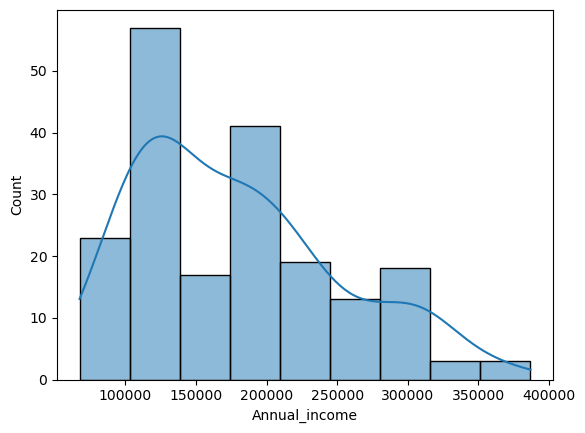

In [86]:
sns.histplot(data2[data2.Type_Occupation=='Others'],x='Annual_income',kde=True)

In [87]:
data2.groupby(['Type_Occupation'])['Annual_income'].mean().sort_values()

Type_Occupation
IT staff                 103500.000000
Cleaning staff           122062.500000
Waiters/barmen staff     122400.000000
Security staff           131318.181818
Low-skill Laborers       131500.000000
Cooking staff            135281.250000
HR staff                 148500.000000
Medicine staff           158992.682927
Secretaries              160312.500000
Sales staff              169952.586207
Core staff               173326.013514
Private service staff    174807.692308
Others                   178939.948454
Laborers                 179448.677419
Accountants              189729.729730
High skill tech staff    194972.727273
Realty agents            202500.000000
Drivers                  215740.384615
Managers                 235093.457944
Name: Annual_income, dtype: float64

In [88]:
data2.groupby(['Type_Occupation'])['Annual_income'].median().sort_values()

Type_Occupation
Waiters/barmen staff      94500.0
IT staff                 103500.0
Security staff           112500.0
Cooking staff            119250.0
Cleaning staff           132750.0
Secretaries              135000.0
Low-skill Laborers       135000.0
HR staff                 144000.0
Private service staff    144000.0
Medicine staff           157500.0
Sales staff              157500.0
Core staff               157500.0
Laborers                 166500.0
Others                   168750.0
High skill tech staff    180000.0
Accountants              180000.0
Drivers                  202500.0
Realty agents            202500.0
Managers                 225000.0
Name: Annual_income, dtype: float64

Text(0.5, 1.0, 'Others')

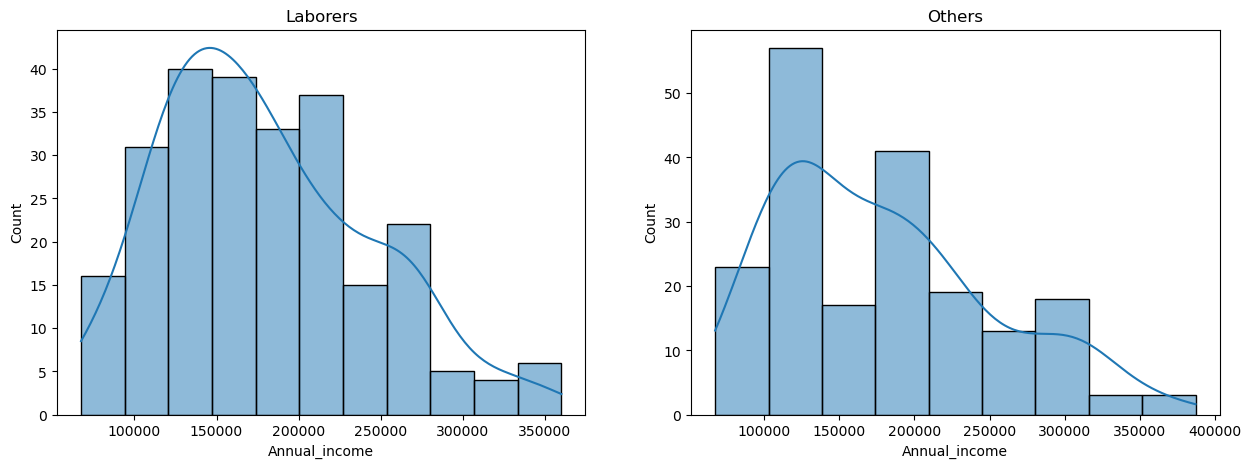

In [89]:
fig,axes=plt.subplots(1,2,figsize=(15,5))
sns.histplot(ax=axes[0],data=data2[data2.Type_Occupation=='Laborers'],x='Annual_income',kde=True)
axes[0].title.set_text("Laborers")
sns.histplot(ax=axes[1],data=data2[data2.Type_Occupation=='Others'],x='Annual_income',kde=True)
plt.title("Others")

In [90]:
data2.Type_Occupation.unique()[1:]

array(['Cooking staff', 'Laborers', 'Sales staff', 'Accountants',
       'Cleaning staff', 'Drivers', 'Low-skill Laborers',
       'High skill tech staff', 'IT staff', 'Managers',
       'Waiters/barmen staff', 'Core staff', 'Medicine staff',
       'Security staff', 'Private service staff', 'HR staff',
       'Secretaries', 'Realty agents'], dtype=object)

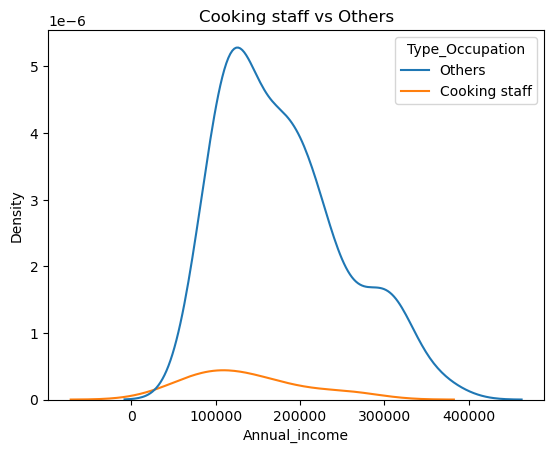

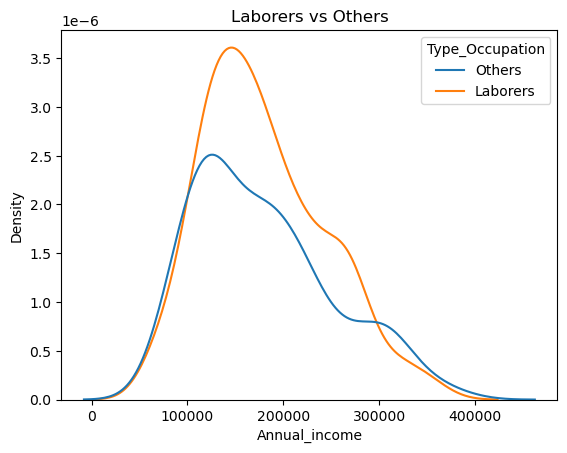

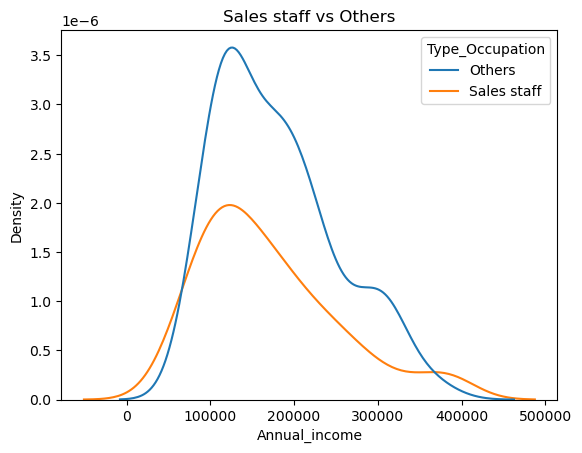

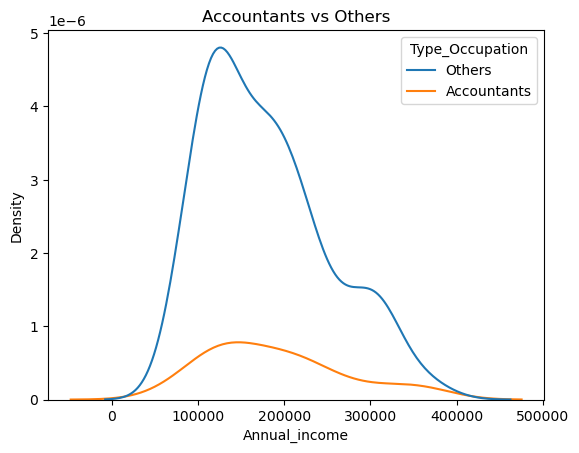

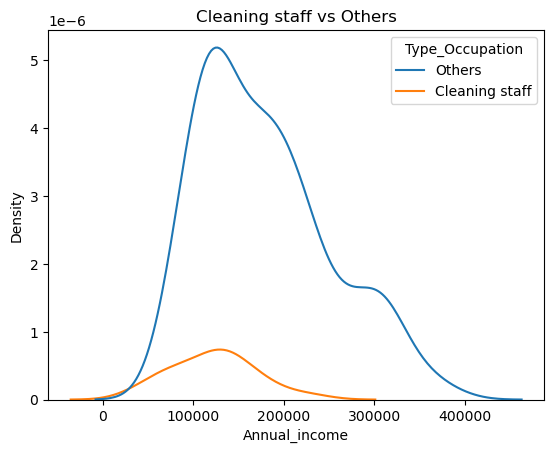

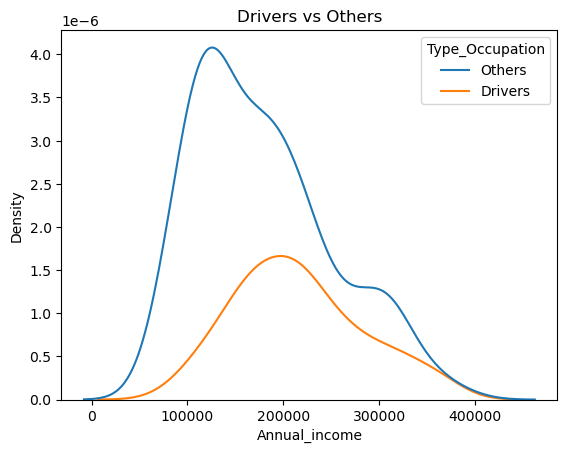

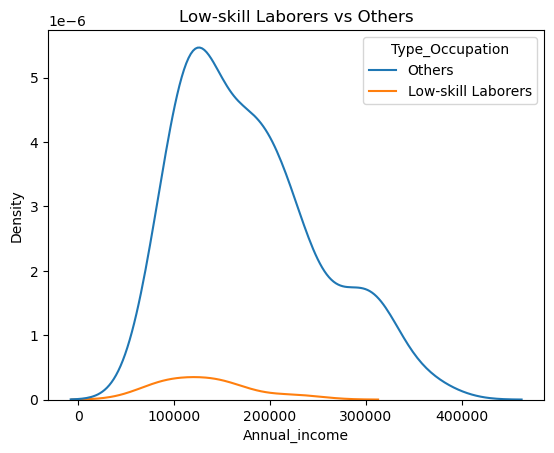

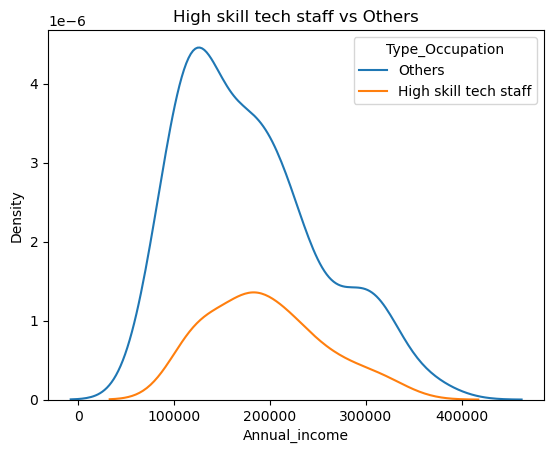

C:\Users\hp\AppData\Local\Temp\ipykernel_3224\2883004575.py:2: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.



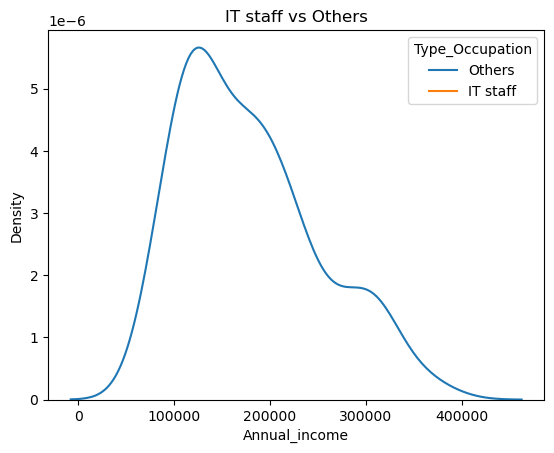

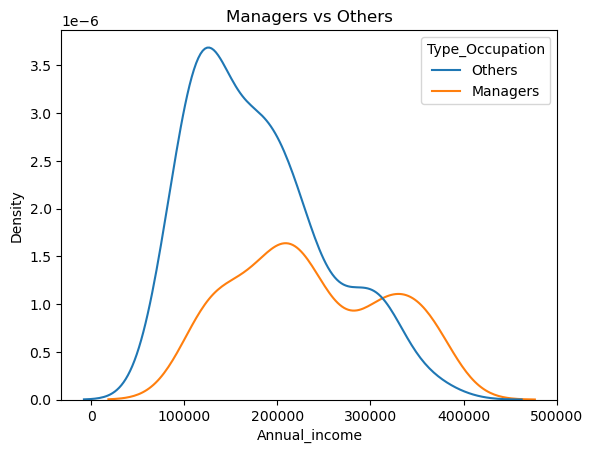

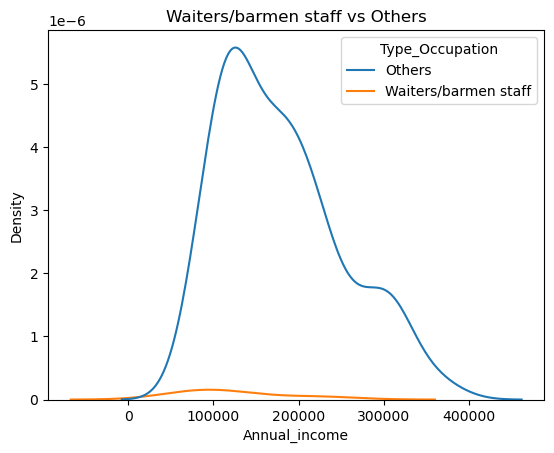

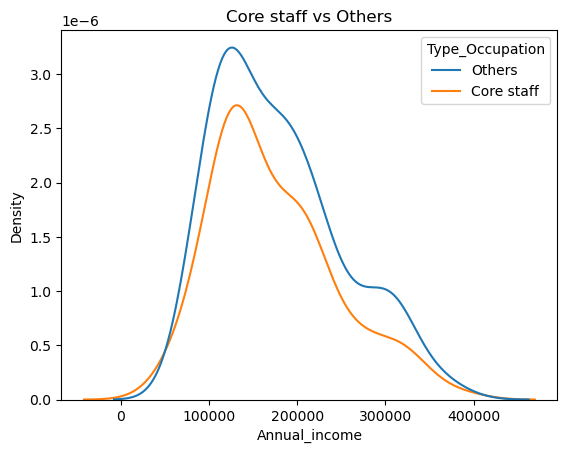

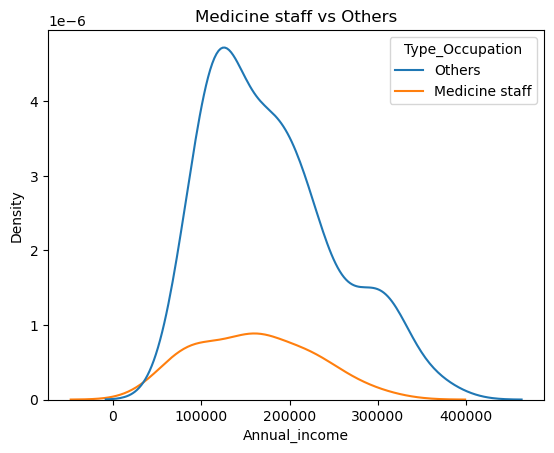

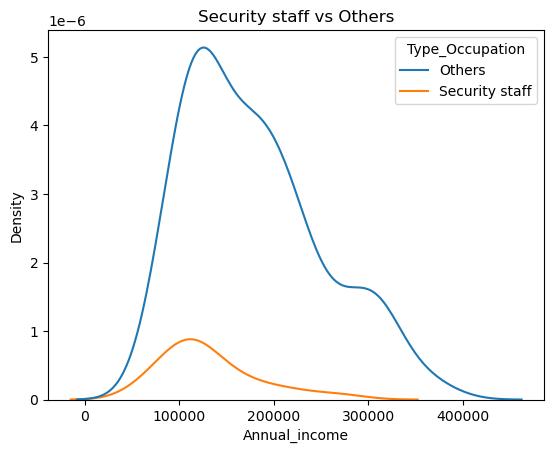

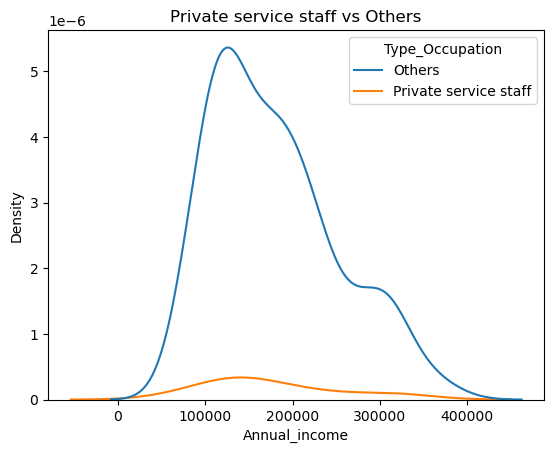

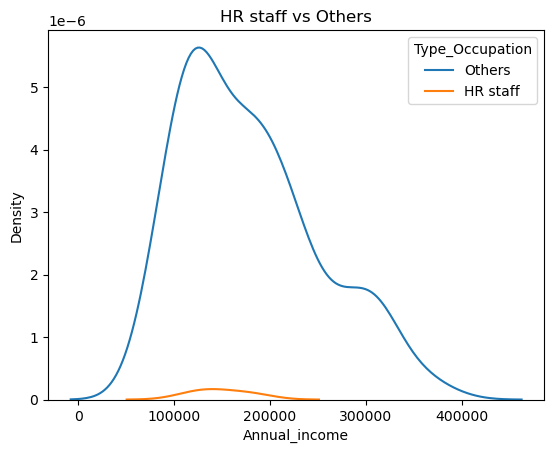

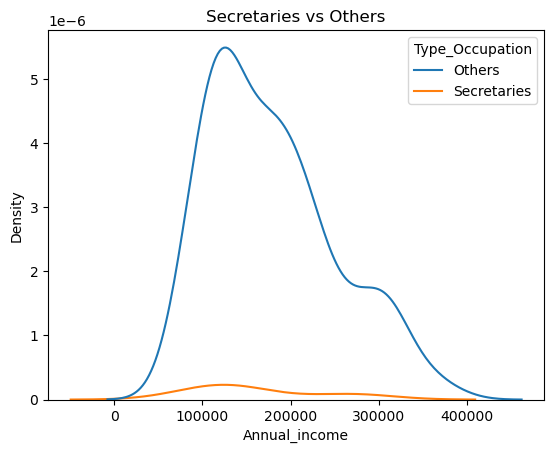

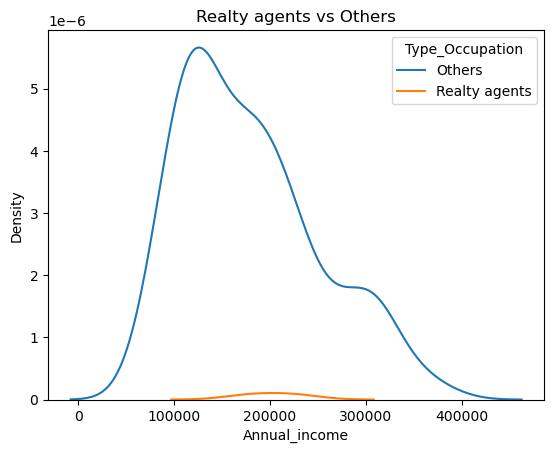

In [91]:
for i in data2.Type_Occupation.unique()[1:]:
    sns.kdeplot(data=data2[(data2.Type_Occupation==i)|(data2.Type_Occupation=="Others")],x='Annual_income',hue='Type_Occupation')
    plt.title(f"{i} vs Others")
    plt.show()

In [92]:
data2[(data2['Type_Occupation']=='IT staff')]

GENDER Car_Owner Propert_Owner  CHILDREN  Annual_income Type_Income  \
54      F         N             Y         0       103500.0     Working   
55      F         N             Y         0       103500.0     Working   

                        EDUCATION Marital_status       Housing_type  \
54  Secondary / secondary special        Married  House / apartment   
55  Secondary / secondary special        Married  House / apartment   

    Work_Phone  Phone  EMAIL_ID Type_Occupation  Family_Members  label  \
54           0      0         1        IT staff               2      1   
55           0      0         1        IT staff               2      1   

    Work_years    Age  
54        1.55  28.48  
55        1.55  28.48

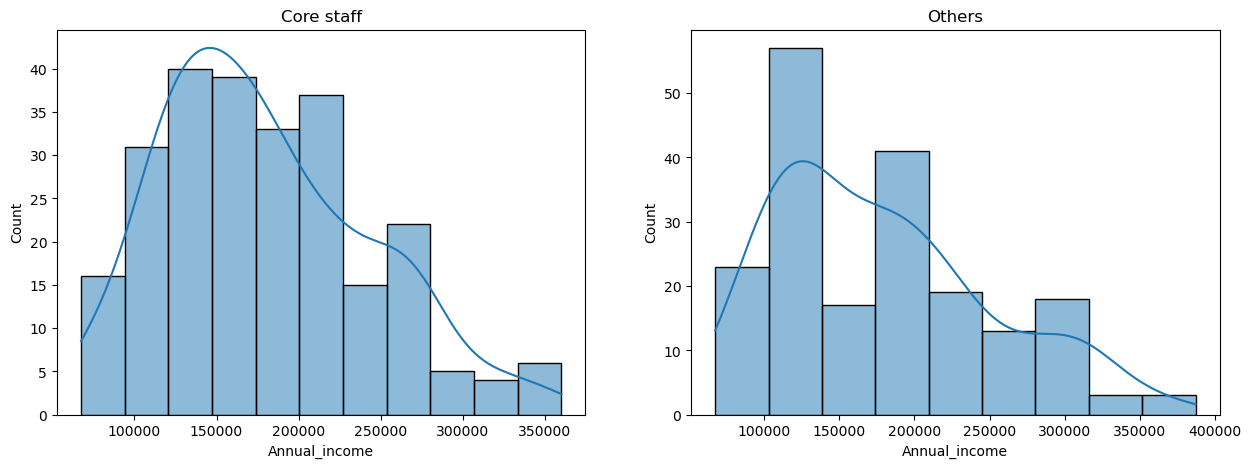

In [93]:
fig,axes=plt.subplots(1,2,figsize=(15,5))

sns.histplot(ax=axes[0],data=data2[data2.Type_Occupation=='Laborers'],x='Annual_income',kde=True)
axes[0].title.set_text("Core staff")
sns.histplot(ax=axes[1],data=data2[data2.Type_Occupation=='Others'],x='Annual_income',kde=True)
axes[1].title.set_text("Others")

Still it has slight variations so keeping others as separate Type_Occupation type

In [94]:
data2.isnull().sum()

GENDER              0
Car_Owner           0
Propert_Owner       0
CHILDREN            0
Annual_income      19
Type_Income         0
EDUCATION           0
Marital_status      0
Housing_type        0
Work_Phone          0
Phone               0
EMAIL_ID            0
Type_Occupation     0
Family_Members      0
label               0
Work_years          0
Age                17
dtype: int64

In [95]:
data2.shape

(1143, 17)

Created data3 we shall encode first the categorical variables with Numerical values so that we can use KNN Imputer

In [96]:
data3=data2.copy(deep=True)

In [97]:
data3.shape

(1143, 17)

<Axes: >

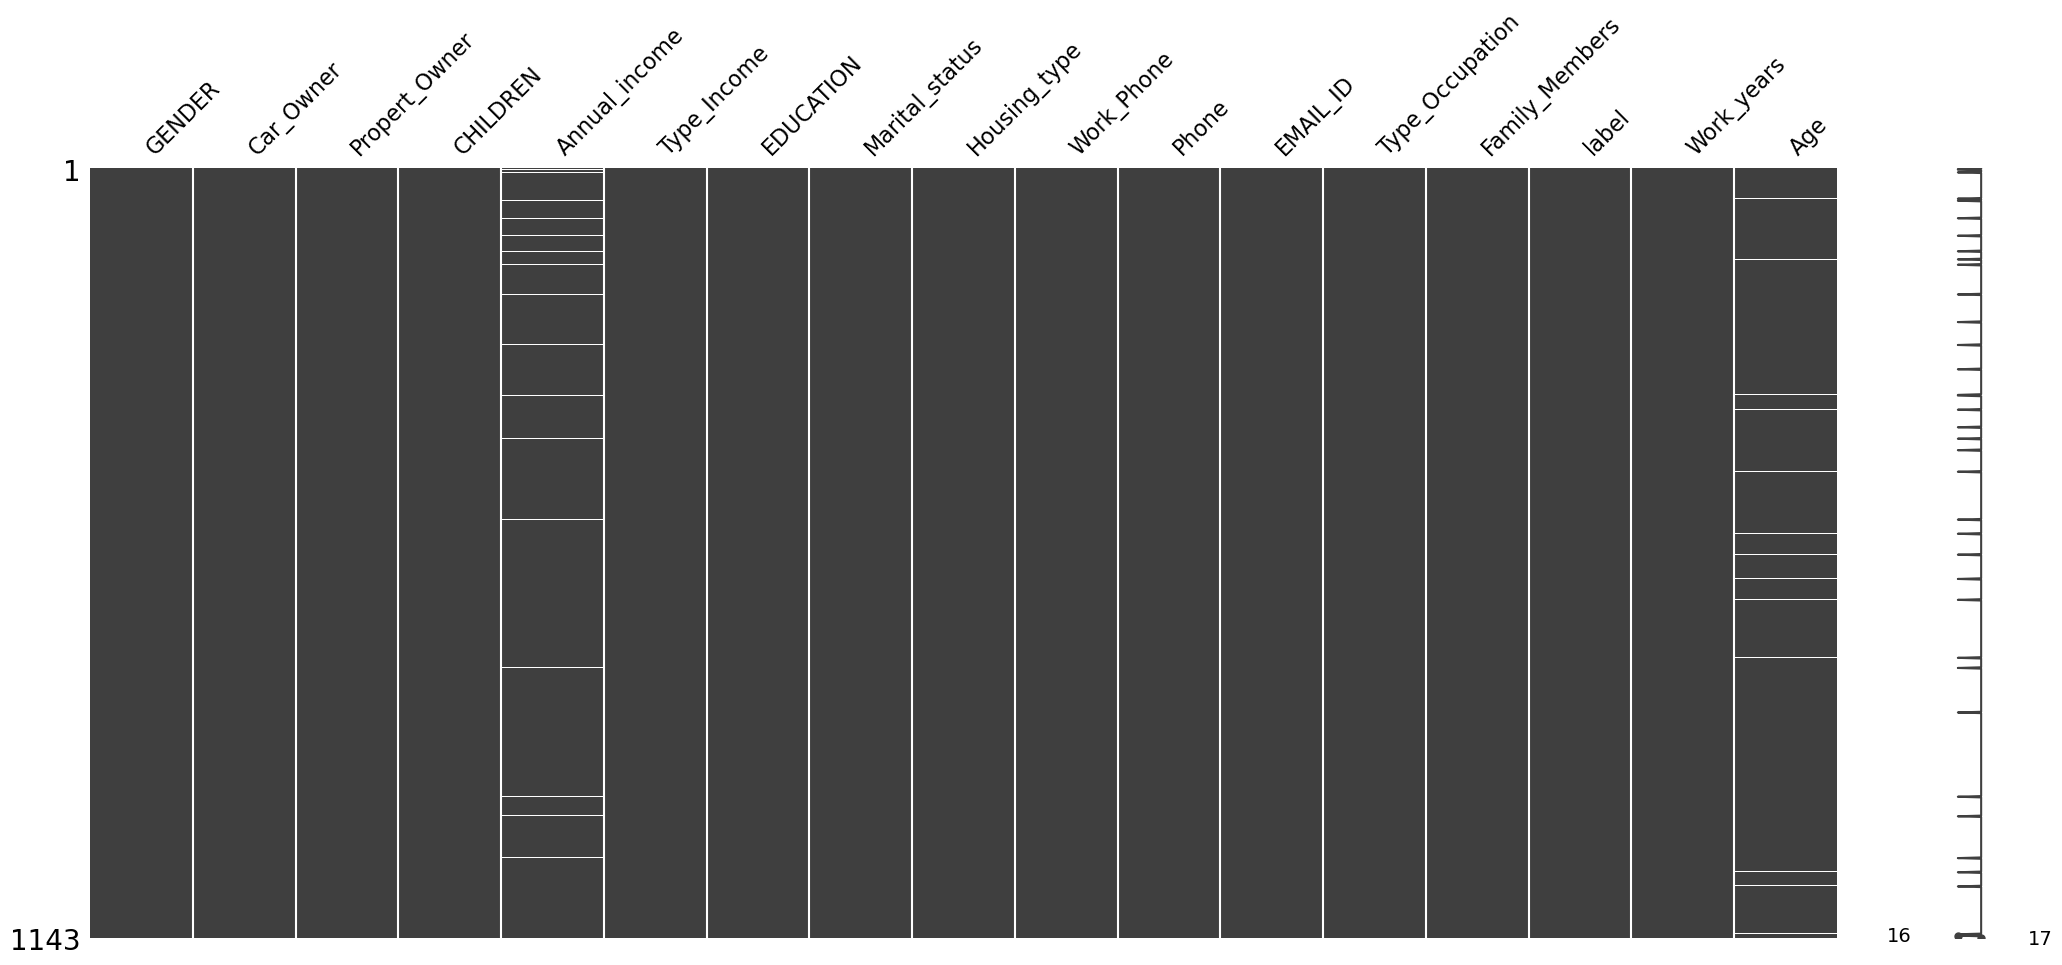

In [102]:
import missingno as msno
msno.matrix(data3)

<Axes: >

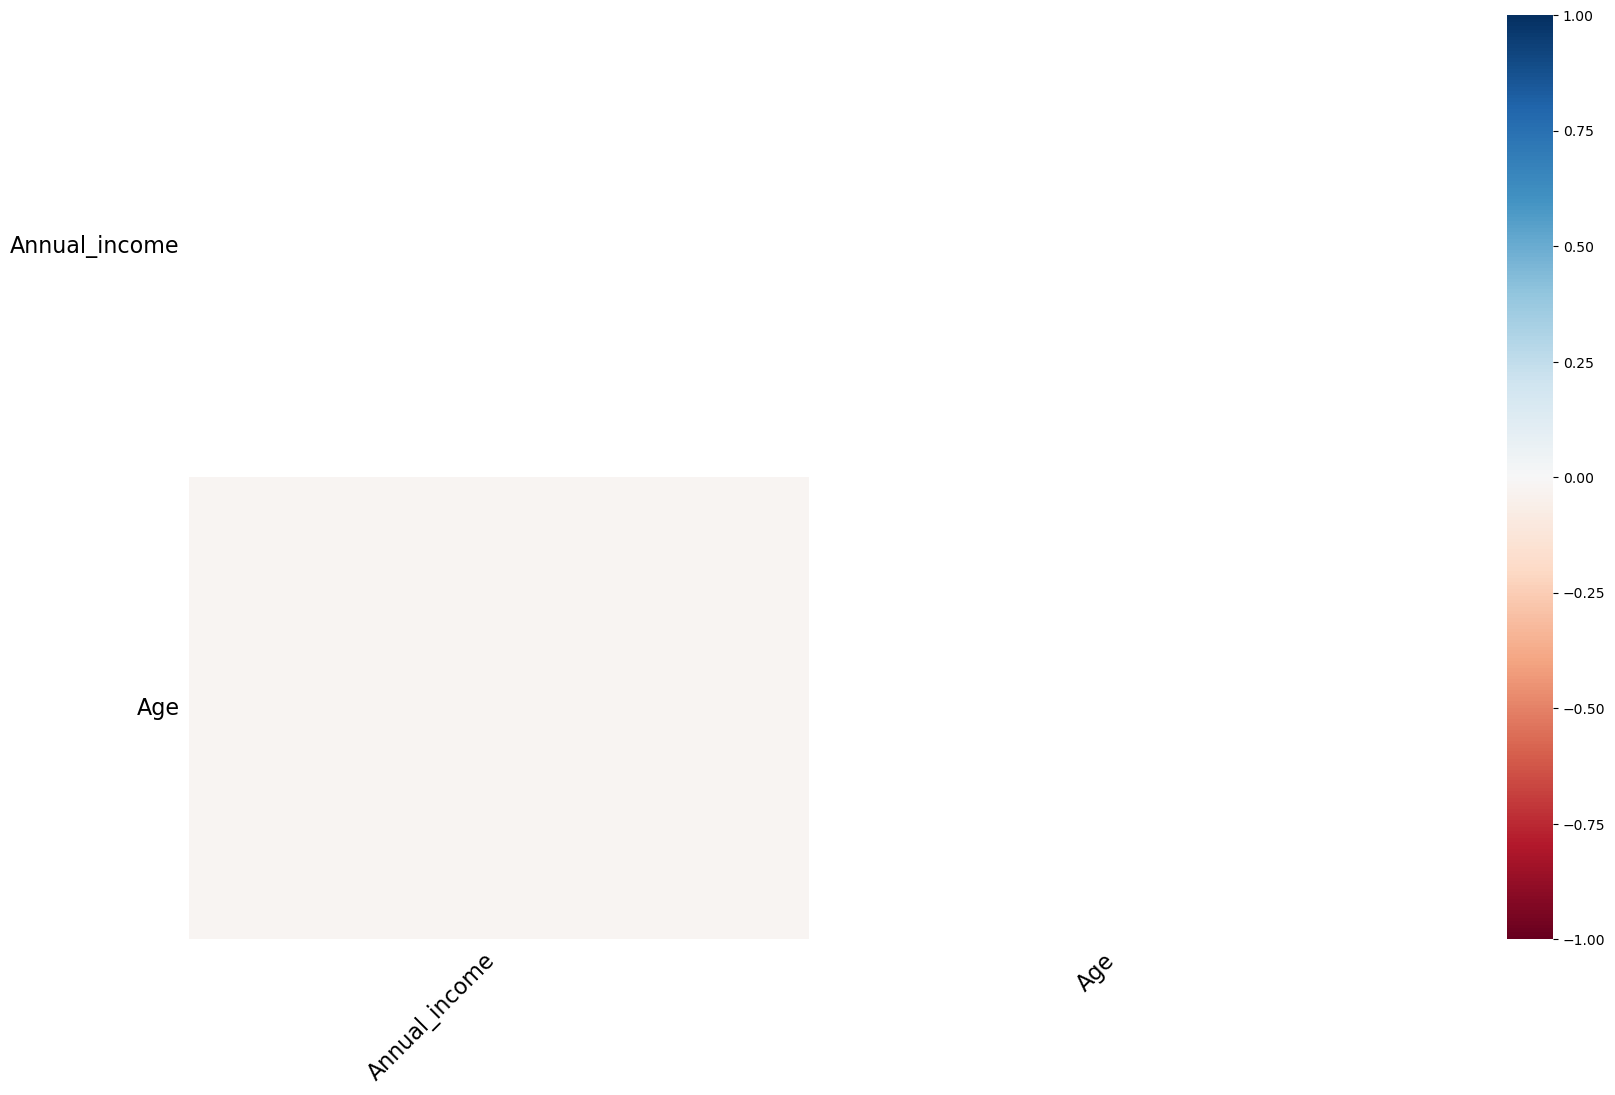

In [103]:
msno.heatmap(data3)

Here it's clear no dependency between missing values

# Encoding

Created data3 we shall encode first the categorical variables with Numerical values

In [104]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1143 entries, 1 to 1547
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   GENDER           1143 non-null   object 
 1   Car_Owner        1143 non-null   object 
 2   Propert_Owner    1143 non-null   object 
 3   CHILDREN         1143 non-null   int64  
 4   Annual_income    1124 non-null   float64
 5   Type_Income      1143 non-null   object 
 6   EDUCATION        1143 non-null   object 
 7   Marital_status   1143 non-null   object 
 8   Housing_type     1143 non-null   object 
 9   Work_Phone       1143 non-null   int64  
 10  Phone            1143 non-null   int64  
 11  EMAIL_ID         1143 non-null   int64  
 12  Type_Occupation  1143 non-null   object 
 13  Family_Members   1143 non-null   int64  
 14  label            1143 non-null   int64  
 15  Work_years       1143 non-null   float64
 16  Age              1126 non-null   float64
dtypes: float64(3),

In [ ]:
# GENDER,Car_Owner,Propert_Owner,Type_income,Marital_status,Type_Occupation
# EDUCATION,Housing_type

In [106]:
data3.GENDER.value_counts()

F    677
M    466
Name: GENDER, dtype: int64

In [107]:
data3.GENDER =data3.GENDER.map({"M":1,"F":0})    
data3.GENDER.value_counts()

0    677
1    466
Name: GENDER, dtype: int64

GENDER--"M":1,"F":0
Car_Owner--"Y":1,"N":0
Propert_Owner---"Y":1,"N":0
Type_Income={'Pensioner':0,'Working':1,'State servant':2,'Commercial associate':3}
EDUCATION={'Lower secondary':0,'Secondary / secondary special':1,'Secondary / secondary special':2,'Incomplete higher':3,'Higher education':4,'Academic degree':5}
Housing_type={'Co-op apartment':0,'Office apartment':1,'Rented apartment':5,'Municipal apartment':4,'With parents':2,'House / apartment':3}
Marital_status=map({'Married':1'Single / not married':0,'Civil marriage':2,'Separated':3,Widow':4})

In [108]:
data3.Car_Owner.value_counts()

N    651
Y    492
Name: Car_Owner, dtype: int64

In [109]:
data3.Car_Owner =data3.Car_Owner.map({"Y":1,"N":0})    
data3.Car_Owner.value_counts()

0    651
1    492
Name: Car_Owner, dtype: int64

In [110]:
data3.Propert_Owner.value_counts()

Y    711
N    432
Name: Propert_Owner, dtype: int64

In [111]:
data3.Propert_Owner =data3.Propert_Owner.map({"Y":1,"N":0})    
data3.Propert_Owner.value_counts()

1    711
0    432
Name: Propert_Owner, dtype: int64

In [112]:
data3.head()

GENDER  Car_Owner  Propert_Owner  CHILDREN  Annual_income  \
1       0          1              0         0       315000.0   
2       0          1              0         0       315000.0   
3       0          1              0         0            NaN   
4       0          1              0         0       315000.0   
6       0          1              0         0       315000.0   

            Type_Income         EDUCATION Marital_status       Housing_type  \
1  Commercial associate  Higher education        Married  House / apartment   
2  Commercial associate  Higher education        Married  House / apartment   
3  Commercial associate  Higher education        Married  House / apartment   
4  Commercial associate  Higher education        Married  House / apartment   
6  Commercial associate  Higher education        Married  House / apartment   

   Work_Phone  Phone  EMAIL_ID Type_Occupation  Family_Members  label  \
1           1      1         0          Others               2      1   
2           1      1         0          Others               2      1   
3           1      1         0          Others               2      1   
4           1      1         0          Others               2      1   
6           1      1         0          Others               2      1   

   Work_years    Age  
1        1.61  37.14  
2        1.61    NaN  
3        1.61  37.14  
4        1.61  37.14  
6        1.61  37.14

In [113]:
data3.Type_Income.value_counts()

Working                 728
Commercial associate    325
State servant            87
Pensioner                 3
Name: Type_Income, dtype: int64

In [122]:
data3.groupby(['Type_Income'])['Annual_income'].mean().sort_values()

Type_Income
Pensioner               135000.000000
Working                 173764.117155
State servant           194637.931034
Commercial associate    198122.082019
Name: Annual_income, dtype: float64

In [ ]:
Type_Income={'Pensioner':0,'Working':1,'State servant':2,'Commercial associate':3}

In [123]:
data3.Type_Income =data3.Type_Income.map({'Pensioner':0,'Working':1,'State servant':2,'Commercial associate':3})    
data3.Type_Income.value_counts()

1    728
3    325
2     87
0      3
Name: Type_Income, dtype: int64

In [124]:
data3.head()

GENDER  Car_Owner  Propert_Owner  CHILDREN  Annual_income  Type_Income  \
1       0          1              0         0       315000.0            3   
2       0          1              0         0       315000.0            3   
3       0          1              0         0            NaN            3   
4       0          1              0         0       315000.0            3   
6       0          1              0         0       315000.0            3   

          EDUCATION Marital_status       Housing_type  Work_Phone  Phone  \
1  Higher education        Married  House / apartment           1      1   
2  Higher education        Married  House / apartment           1      1   
3  Higher education        Married  House / apartment           1      1   
4  Higher education        Married  House / apartment           1      1   
6  Higher education        Married  House / apartment           1      1   

   EMAIL_ID Type_Occupation  Family_Members  label  Work_years    Age  
1         0          Others               2      1        1.61  37.14  
2         0          Others               2      1        1.61    NaN  
3         0          Others               2      1        1.61  37.14  
4         0          Others               2      1        1.61  37.14  
6         0          Others               2      1        1.61  37.14

In [114]:
data3.EDUCATION.value_counts()

Secondary / secondary special    737
Higher education                 329
Incomplete higher                 62
Lower secondary                   14
Academic degree                    1
Name: EDUCATION, dtype: int64

In [125]:
data3.EDUCATION =data3.EDUCATION.map({'Lower secondary':0,'Secondary / secondary special':1,'Secondary / secondary special':2,'Incomplete higher':3,'Higher education':4,'Academic degree':5})
data3.EDUCATION.value_counts()

2    737
4    329
3     62
0     14
5      1
Name: EDUCATION, dtype: int64

In [126]:
data3.shape

(1143, 17)

In [116]:
data3.Marital_status.value_counts()

Married                 805
Single / not married    168
Civil marriage           83
Separated                60
Widow                    27
Name: Marital_status, dtype: int64

In [ ]:
map({'Married':1'Single / not married':0,'Civil marriage':2,'Separated':3,Widow':4})

In [131]:
data3.Marital_status=data3.Marital_status.map({'Married':1,'Single / not married':0,'Civil marriage':2,'Separated':3,'Widow':4})
data3.Marital_status.value_counts()

1    805
0    168
2     83
3     60
4     27
Name: Marital_status, dtype: int64

In [117]:
data3.Housing_type.value_counts()

House / apartment      1008
With parents             72
Municipal apartment      36
Rented apartment         18
Office apartment          6
Co-op apartment           3
Name: Housing_type, dtype: int64

In [ ]:
{'Co-op apartment':0,'Office apartment':1,'Rented apartment':5,'Municipal apartment':4,'With parents':2,'House / apartment':3}

In [132]:
data3.groupby(['Housing_type'])['Annual_income'].mean().sort_values()

Housing_type
Co-op apartment        127500.000000
Office apartment       154500.000000
With parents           178218.750000
House / apartment      182579.618182
Municipal apartment    183471.428571
Rented apartment       189750.000000
Name: Annual_income, dtype: float64

In [133]:
data3.groupby(['Housing_type'])['Annual_income'].median().sort_values()

Housing_type
Co-op apartment        135000.0
Office apartment       153000.0
With parents           168750.0
House / apartment      180000.0
Municipal apartment    180000.0
Rented apartment       202500.0
Name: Annual_income, dtype: float64

In [134]:
data3.Housing_type=data3.Housing_type.map({'Co-op apartment':0,'Office apartment':1,'Rented apartment':5,'Municipal apartment':4,'With parents':2,'House / apartment':3})
data3.Housing_type.value_counts()

3    1008
2      72
4      36
5      18
1       6
0       3
Name: Housing_type, dtype: int64

In [135]:
data3

GENDER  Car_Owner  Propert_Owner  CHILDREN  Annual_income  Type_Income  \
1          0          1              0         0       315000.0            3   
2          0          1              0         0       315000.0            3   
3          0          1              0         0            NaN            3   
4          0          1              0         0       315000.0            3   
6          0          1              0         0       315000.0            3   
...      ...        ...            ...       ...            ...          ...   
1543       0          0              1         0            NaN            3   
1544       0          0              0         0       225000.0            3   
1545       1          1              1         2       180000.0            1   
1546       1          1              0         0       270000.0            1   
1547       0          1              1         0       225000.0            1   

      EDUCATION  Marital_status  Housing_type  Work_Phone  Phone  EMAIL_ID  \
1             4               1             3           1      1         0   
2             4               1             3           1      1         0   
3             4               1             3           1      1         0   
4             4               1             3           1      1         0   
6             4               1             3           1      1         0   
...         ...             ...           ...         ...    ...       ...   
1543          4               1             3           0      0         0   
1544          3               0             3           0      0         0   
1545          4               1             3           0      0         0   
1546          2               2             3           1      1         0   
1547          4               1             3           0      0         0   

     Type_Occupation  Family_Members  label  Work_years    Age  
1             Others               2      1        1.61  37.14  
2             Others               2      1        1.61    NaN  
3             Others               2      1        1.61  37.14  
4             Others               2      1        1.61  37.14  
6             Others               2      1        1.61  37.14  
...              ...             ...    ...         ...    ...  
1543        Managers               2      0        5.98  32.76  
1544     Accountants               1      0        3.31  28.02  
1545        Managers               4      0        6.79  36.09  
1546         Drivers               2      0        1.77  41.90  
1547          Others               2      0        7.83  45.48  

[1143 rows x 17 columns]

GENDER--"M":1,"F":0
Car_Owner--"Y":1,"N":0
Propert_Owner---"Y":1,"N":0
Type_Income={'Pensioner':0,'Working':1,'State servant':2,'Commercial associate':3}
EDUCATION={'Lower secondary':0,'Secondary / secondary special':1,'Secondary / secondary special':2,'Incomplete higher':3,'Higher education':4,'Academic degree':5}
Housing_type={'Co-op apartment':0,'Office apartment':1,'Rented apartment':5,'Municipal apartment':4,'With parents':2,'House / apartment':3}
Marital_status=map({'Married':1'Single / not married':0,'Civil marriage':2,'Separated':3,Widow':4})

In [136]:
data3.groupby(['Type_Occupation'])['Annual_income'].mean().sort_values()

Type_Occupation
IT staff                 103500.000000
Cleaning staff           122062.500000
Waiters/barmen staff     122400.000000
Security staff           131318.181818
Low-skill Laborers       131500.000000
Cooking staff            135281.250000
HR staff                 148500.000000
Medicine staff           158992.682927
Secretaries              160312.500000
Sales staff              169952.586207
Core staff               173326.013514
Private service staff    174807.692308
Others                   178939.948454
Laborers                 179448.677419
Accountants              189729.729730
High skill tech staff    194972.727273
Realty agents            202500.000000
Drivers                  215740.384615
Managers                 235093.457944
Name: Annual_income, dtype: float64

In [137]:
data3.Type_Occupation.value_counts()

Laborers                 250
Others                   198
Core staff               149
Sales staff              117
Managers                 110
Drivers                   79
High skill tech staff     56
Medicine staff            41
Accountants               38
Security staff            23
Cleaning staff            22
Cooking staff             18
Private service staff     13
Low-skill Laborers         9
Secretaries                8
Waiters/barmen staff       5
HR staff                   3
IT staff                   2
Realty agents              2
Name: Type_Occupation, dtype: int64

In [138]:
data3.Type_Occupation=data3.Type_Occupation.map({'IT staff':0,
'Cleaning staff':1,
'Waiters/barmen staff':2,
'Security staff':3,
'Low-skill Laborers':4,
'Cooking staff':5,
'HR staff':6,
'Medicine staff':7,
'Secretaries':8,
'Sales staff':9,
'Core staff':10,
'Private service staff':11,
'Others':12,
'Laborers':13,
'Accountants':14,
'High skill tech staff':15,
'Realty agents':16,
'Drivers':17,
'Managers':18})
data3.Type_Occupation.value_counts()

13    250
12    198
10    149
9     117
18    110
17     79
15     56
7      41
14     38
3      23
1      22
5      18
11     13
4       9
8       8
2       5
6       3
0       2
16      2
Name: Type_Occupation, dtype: int64

In [139]:
data3

GENDER  Car_Owner  Propert_Owner  CHILDREN  Annual_income  Type_Income  \
1          0          1              0         0       315000.0            3   
2          0          1              0         0       315000.0            3   
3          0          1              0         0            NaN            3   
4          0          1              0         0       315000.0            3   
6          0          1              0         0       315000.0            3   
...      ...        ...            ...       ...            ...          ...   
1543       0          0              1         0            NaN            3   
1544       0          0              0         0       225000.0            3   
1545       1          1              1         2       180000.0            1   
1546       1          1              0         0       270000.0            1   
1547       0          1              1         0       225000.0            1   

      EDUCATION  Marital_status  Housing_type  Work_Phone  Phone  EMAIL_ID  \
1             4               1             3           1      1         0   
2             4               1             3           1      1         0   
3             4               1             3           1      1         0   
4             4               1             3           1      1         0   
6             4               1             3           1      1         0   
...         ...             ...           ...         ...    ...       ...   
1543          4               1             3           0      0         0   
1544          3               0             3           0      0         0   
1545          4               1             3           0      0         0   
1546          2               2             3           1      1         0   
1547          4               1             3           0      0         0   

      Type_Occupation  Family_Members  label  Work_years    Age  
1                  12               2      1        1.61  37.14  
2                  12               2      1        1.61    NaN  
3                  12               2      1        1.61  37.14  
4                  12               2      1        1.61  37.14  
6                  12               2      1        1.61  37.14  
...               ...             ...    ...         ...    ...  
1543               18               2      0        5.98  32.76  
1544               14               1      0        3.31  28.02  
1545               18               4      0        6.79  36.09  
1546               17               2      0        1.77  41.90  
1547               12               2      0        7.83  45.48  

[1143 rows x 17 columns]

In [140]:
data3.isnull().sum()

GENDER              0
Car_Owner           0
Propert_Owner       0
CHILDREN            0
Annual_income      19
Type_Income         0
EDUCATION           0
Marital_status      0
Housing_type        0
Work_Phone          0
Phone               0
EMAIL_ID            0
Type_Occupation     0
Family_Members      0
label               0
Work_years          0
Age                17
dtype: int64

In [141]:
data_KNN=data3.copy(deep=True)
data_KNN

GENDER  Car_Owner  Propert_Owner  CHILDREN  Annual_income  Type_Income  \
1          0          1              0         0       315000.0            3   
2          0          1              0         0       315000.0            3   
3          0          1              0         0            NaN            3   
4          0          1              0         0       315000.0            3   
6          0          1              0         0       315000.0            3   
...      ...        ...            ...       ...            ...          ...   
1543       0          0              1         0            NaN            3   
1544       0          0              0         0       225000.0            3   
1545       1          1              1         2       180000.0            1   
1546       1          1              0         0       270000.0            1   
1547       0          1              1         0       225000.0            1   

      EDUCATION  Marital_status  Housing_type  Work_Phone  Phone  EMAIL_ID  \
1             4               1             3           1      1         0   
2             4               1             3           1      1         0   
3             4               1             3           1      1         0   
4             4               1             3           1      1         0   
6             4               1             3           1      1         0   
...         ...             ...           ...         ...    ...       ...   
1543          4               1             3           0      0         0   
1544          3               0             3           0      0         0   
1545          4               1             3           0      0         0   
1546          2               2             3           1      1         0   
1547          4               1             3           0      0         0   

      Type_Occupation  Family_Members  label  Work_years    Age  
1                  12               2      1        1.61  37.14  
2                  12               2      1        1.61    NaN  
3                  12               2      1        1.61  37.14  
4                  12               2      1        1.61  37.14  
6                  12               2      1        1.61  37.14  
...               ...             ...    ...         ...    ...  
1543               18               2      0        5.98  32.76  
1544               14               1      0        3.31  28.02  
1545               18               4      0        6.79  36.09  
1546               17               2      0        1.77  41.90  
1547               12               2      0        7.83  45.48  

[1143 rows x 17 columns]

In [142]:
from sklearn.impute import KNNImputer
k=KNNImputer()
data_KNN.iloc[:,:]=k.fit_transform(data_KNN)

C:\Users\hp\AppData\Local\Temp\ipykernel_3224\762533264.py:3: DeprecationWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`



In [143]:
data_KNN

GENDER  Car_Owner  Propert_Owner  CHILDREN  Annual_income  Type_Income  \
1        0.0        1.0            0.0       0.0       315000.0          3.0   
2        0.0        1.0            0.0       0.0       315000.0          3.0   
3        0.0        1.0            0.0       0.0       283500.0          3.0   
4        0.0        1.0            0.0       0.0       315000.0          3.0   
6        0.0        1.0            0.0       0.0       315000.0          3.0   
...      ...        ...            ...       ...            ...          ...   
1543     0.0        0.0            1.0       0.0       287100.0          3.0   
1544     0.0        0.0            0.0       0.0       225000.0          3.0   
1545     1.0        1.0            1.0       2.0       180000.0          1.0   
1546     1.0        1.0            0.0       0.0       270000.0          1.0   
1547     0.0        1.0            1.0       0.0       225000.0          1.0   

      EDUCATION  Marital_status  Housing_type  Work_Phone  Phone  EMAIL_ID  \
1           4.0             1.0           3.0         1.0    1.0       0.0   
2           4.0             1.0           3.0         1.0    1.0       0.0   
3           4.0             1.0           3.0         1.0    1.0       0.0   
4           4.0             1.0           3.0         1.0    1.0       0.0   
6           4.0             1.0           3.0         1.0    1.0       0.0   
...         ...             ...           ...         ...    ...       ...   
1543        4.0             1.0           3.0         0.0    0.0       0.0   
1544        3.0             0.0           3.0         0.0    0.0       0.0   
1545        4.0             1.0           3.0         0.0    0.0       0.0   
1546        2.0             2.0           3.0         1.0    1.0       0.0   
1547        4.0             1.0           3.0         0.0    0.0       0.0   

      Type_Occupation  Family_Members  label  Work_years    Age  
1                12.0             2.0    1.0        1.61  37.14  
2                12.0             2.0    1.0        1.61  39.75  
3                12.0             2.0    1.0        1.61  37.14  
4                12.0             2.0    1.0        1.61  37.14  
6                12.0             2.0    1.0        1.61  37.14  
...               ...             ...    ...         ...    ...  
1543             18.0             2.0    0.0        5.98  32.76  
1544             14.0             1.0    0.0        3.31  28.02  
1545             18.0             4.0    0.0        6.79  36.09  
1546             17.0             2.0    0.0        1.77  41.90  
1547             12.0             2.0    0.0        7.83  45.48  

[1143 rows x 17 columns]

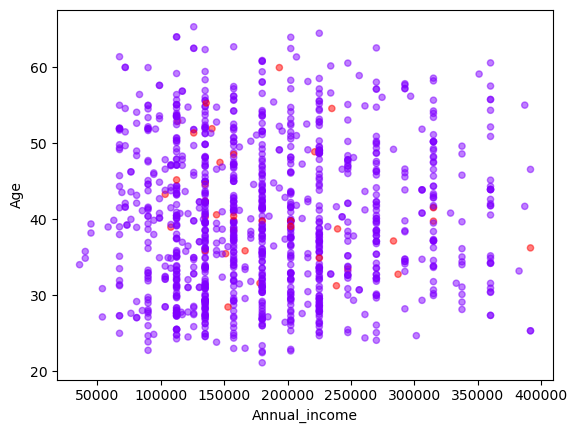

In [160]:
nullity=data3.Annual_income.isnull()+data3.Age.isnull()
data_KNN.plot(x='Annual_income',y='Age',kind='scatter',c=nullity,cmap='rainbow',alpha=0.5,colorbar=False)
plt.show()

<Axes: xlabel='Work_Phone', ylabel='count'>

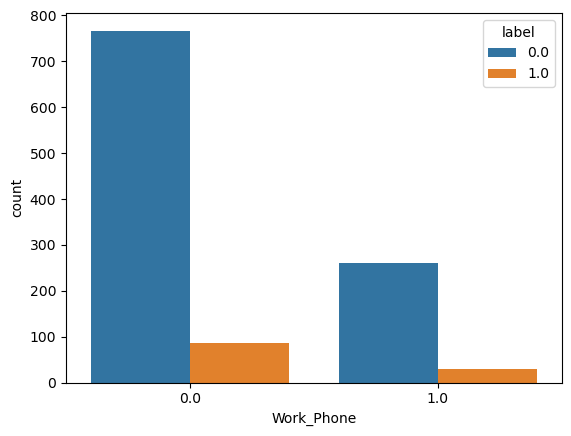

In [165]:
sns.countplot(data_KNN,x='Work_Phone',hue='label')
# sns.countplot(data_KNN,x='Phone',hue='label')

In [170]:
data_KNN[['Annual_income','Family_Members','CHILDREN','Work_years','Age']].corr(method='spearman')

Annual_income  Family_Members  CHILDREN  Work_years       Age
Annual_income        1.000000       -0.021275 -0.023769    0.090307  0.023303
Family_Members      -0.021275        1.000000  0.856243    0.072505 -0.136205
CHILDREN            -0.023769        0.856243  1.000000    0.033461 -0.209165
Work_years           0.090307        0.072505  0.033461    1.000000  0.212890
Age                  0.023303       -0.136205 -0.209165    0.212890  1.000000

In [173]:
data_KNN.columns

Index(['GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN', 'Annual_income',
       'Type_Income', 'EDUCATION', 'Marital_status', 'Housing_type',
       'Work_Phone', 'Phone', 'EMAIL_ID', 'Type_Occupation', 'Family_Members',
       'label', 'Work_years', 'Age'],
      dtype='object')

In [261]:
data_KNN.isnull().sum()

GENDER             0
Car_Owner          0
Propert_Owner      0
CHILDREN           0
Annual_income      0
Type_Income        0
EDUCATION          0
Marital_status     0
Housing_type       0
Work_Phone         0
Phone              0
EMAIL_ID           0
Type_Occupation    0
Family_Members     0
label              0
Work_years         0
Age                0
dtype: int64

In [262]:
data_KNN.shape

(1143, 17)

In [264]:
data_SQL=data_KNN.copy(deep=True)
data_SQL

GENDER  Car_Owner  Propert_Owner  CHILDREN  Annual_income  Type_Income  \
1        0.0        1.0            0.0       0.0       315000.0          3.0   
2        0.0        1.0            0.0       0.0       315000.0          3.0   
3        0.0        1.0            0.0       0.0       283500.0          3.0   
4        0.0        1.0            0.0       0.0       315000.0          3.0   
6        0.0        1.0            0.0       0.0       315000.0          3.0   
...      ...        ...            ...       ...            ...          ...   
1543     0.0        0.0            1.0       0.0       287100.0          3.0   
1544     0.0        0.0            0.0       0.0       225000.0          3.0   
1545     1.0        1.0            1.0       2.0       180000.0          1.0   
1546     1.0        1.0            0.0       0.0       270000.0          1.0   
1547     0.0        1.0            1.0       0.0       225000.0          1.0   

      EDUCATION  Marital_status  Housing_type  Work_Phone  Phone  EMAIL_ID  \
1           4.0             1.0           3.0         1.0    1.0       0.0   
2           4.0             1.0           3.0         1.0    1.0       0.0   
3           4.0             1.0           3.0         1.0    1.0       0.0   
4           4.0             1.0           3.0         1.0    1.0       0.0   
6           4.0             1.0           3.0         1.0    1.0       0.0   
...         ...             ...           ...         ...    ...       ...   
1543        4.0             1.0           3.0         0.0    0.0       0.0   
1544        3.0             0.0           3.0         0.0    0.0       0.0   
1545        4.0             1.0           3.0         0.0    0.0       0.0   
1546        2.0             2.0           3.0         1.0    1.0       0.0   
1547        4.0             1.0           3.0         0.0    0.0       0.0   

      Type_Occupation  Family_Members  label  Work_years    Age  
1                12.0             2.0    1.0        1.61  37.14  
2                12.0             2.0    1.0        1.61  39.75  
3                12.0             2.0    1.0        1.61  37.14  
4                12.0             2.0    1.0        1.61  37.14  
6                12.0             2.0    1.0        1.61  37.14  
...               ...             ...    ...         ...    ...  
1543             18.0             2.0    0.0        5.98  32.76  
1544             14.0             1.0    0.0        3.31  28.02  
1545             18.0             4.0    0.0        6.79  36.09  
1546             17.0             2.0    0.0        1.77  41.90  
1547             12.0             2.0    0.0        7.83  45.48  

[1143 rows x 17 columns]

Here we will again change to old categorical columns for analysing in SQL 
GENDER--"M":1,"F":0
Car_Owner--"Y":1,"N":0
Propert_Owner---"Y":1,"N":0
Type_Income={'Pensioner':0,'Working':1,'State servant':2,'Commercial associate':3}
EDUCATION={'Lower secondary':0,'Secondary / secondary special':1,'Secondary / secondary special':2,'Incomplete higher':3,'Higher education':4,'Academic degree':5}
Housing_type={'Co-op apartment':0,'Office apartment':1,'Rented apartment':5,'Municipal apartment':4,'With parents':2,'House / apartment':3}
Marital_status=map({'Married':1'Single / not married':0,'Civil marriage':2,'Separated':3,Widow':4})

In [ ]:
Type_Occupation.map({'IT staff':0,
'Cleaning staff':1,
'Waiters/barmen staff':2,
'Security staff':3,
'Low-skill Laborers':4,
'Cooking staff':5,
'HR staff':6,
'Medicine staff':7,
'Secretaries':8,
'Sales staff':9,
'Core staff':10,
'Private service staff':11,
'Others':12,
'Laborers':13,
'Accountants':14,
'High skill tech staff':15,
'Realty agents':16,
'Drivers':17,
'Managers':18})

In [266]:
data_SQL['GENDER']=data_SQL['GENDER'].map({1:'M',0:'F'})
data_SQL

GENDER  Car_Owner  Propert_Owner  CHILDREN  Annual_income  Type_Income  \
1         F        1.0            0.0       0.0       315000.0          3.0   
2         F        1.0            0.0       0.0       315000.0          3.0   
3         F        1.0            0.0       0.0       283500.0          3.0   
4         F        1.0            0.0       0.0       315000.0          3.0   
6         F        1.0            0.0       0.0       315000.0          3.0   
...     ...        ...            ...       ...            ...          ...   
1543      F        0.0            1.0       0.0       287100.0          3.0   
1544      F        0.0            0.0       0.0       225000.0          3.0   
1545      M        1.0            1.0       2.0       180000.0          1.0   
1546      M        1.0            0.0       0.0       270000.0          1.0   
1547      F        1.0            1.0       0.0       225000.0          1.0   

      EDUCATION  Marital_status  Housing_type  Work_Phone  Phone  EMAIL_ID  \
1           4.0             1.0           3.0         1.0    1.0       0.0   
2           4.0             1.0           3.0         1.0    1.0       0.0   
3           4.0             1.0           3.0         1.0    1.0       0.0   
4           4.0             1.0           3.0         1.0    1.0       0.0   
6           4.0             1.0           3.0         1.0    1.0       0.0   
...         ...             ...           ...         ...    ...       ...   
1543        4.0             1.0           3.0         0.0    0.0       0.0   
1544        3.0             0.0           3.0         0.0    0.0       0.0   
1545        4.0             1.0           3.0         0.0    0.0       0.0   
1546        2.0             2.0           3.0         1.0    1.0       0.0   
1547        4.0             1.0           3.0         0.0    0.0       0.0   

      Type_Occupation  Family_Members  label  Work_years    Age  
1                12.0             2.0    1.0        1.61  37.14  
2                12.0             2.0    1.0        1.61  39.75  
3                12.0             2.0    1.0        1.61  37.14  
4                12.0             2.0    1.0        1.61  37.14  
6                12.0             2.0    1.0        1.61  37.14  
...               ...             ...    ...         ...    ...  
1543             18.0             2.0    0.0        5.98  32.76  
1544             14.0             1.0    0.0        3.31  28.02  
1545             18.0             4.0    0.0        6.79  36.09  
1546             17.0             2.0    0.0        1.77  41.90  
1547             12.0             2.0    0.0        7.83  45.48  

[1143 rows x 17 columns]

In [267]:
data_SQL['Car_Owner']=data_SQL['Car_Owner'].map({1:'Y',0:'N'})
data_SQL['Propert_Owner']=data_SQL['Propert_Owner'].map({1:'Y',0:'N'})

In [269]:
data_SQL['Type_Income']=data_SQL['Type_Income'].map({0:'Pensioner',1:'Working',2:'State servant',3:'Commercial associate'})

In [270]:
data_SQL['EDUCATION']=data_SQL['EDUCATION'].map({0:'Lower secondary',1:'Secondary / secondary special',
           2:'Secondary / secondary special',3:'Incomplete higher',4:'Higher education',5:'Academic degree'})

In [272]:
data_SQL['Marital_status']=data_SQL['Marital_status'].map({1:'Married',0:'Single / not married',
                                                           2:'Civil marriage',3:'Separated',4:'Widow'})

In [273]:
data_SQL['Housing_type']=data_SQL['Housing_type'].map({0:'Co-op apartment',1:'Office apartment',5:'Rented apartment',
                                                       4:'Municipal apartment',2:'With parents',3:'House / apartment'})


In [275]:
data_SQL['Type_Occupation']=data_SQL['Type_Occupation'].map({0:'IT staff',1:'Cleaning staff',
2:'Waiters/barmen staff',
3:'Security staff',
4:'Low-skill Laborers',
5:'Cooking staff',
6:'HR staff',
7:'Medicine staff',
8:'Secretaries',
9:'Sales staff',
10:'Core staff',
11:'Private service staff',
12:'Others',
13:'Laborers',
14:'Accountants',
15:'High skill tech staff',
16:'Realty agents',
17:'Drivers',
18:'Managers'})
data_SQL

GENDER Car_Owner Propert_Owner  CHILDREN  Annual_income  \
1         F         Y             N       0.0       315000.0   
2         F         Y             N       0.0       315000.0   
3         F         Y             N       0.0       283500.0   
4         F         Y             N       0.0       315000.0   
6         F         Y             N       0.0       315000.0   
...     ...       ...           ...       ...            ...   
1543      F         N             Y       0.0       287100.0   
1544      F         N             N       0.0       225000.0   
1545      M         Y             Y       2.0       180000.0   
1546      M         Y             N       0.0       270000.0   
1547      F         Y             Y       0.0       225000.0   

               Type_Income                      EDUCATION  \
1     Commercial associate               Higher education   
2     Commercial associate               Higher education   
3     Commercial associate               Higher education   
4     Commercial associate               Higher education   
6     Commercial associate               Higher education   
...                    ...                            ...   
1543  Commercial associate               Higher education   
1544  Commercial associate              Incomplete higher   
1545               Working               Higher education   
1546               Working  Secondary / secondary special   
1547               Working               Higher education   

            Marital_status       Housing_type  Work_Phone  Phone  EMAIL_ID  \
1                  Married  House / apartment         1.0    1.0       0.0   
2                  Married  House / apartment         1.0    1.0       0.0   
3                  Married  House / apartment         1.0    1.0       0.0   
4                  Married  House / apartment         1.0    1.0       0.0   
6                  Married  House / apartment         1.0    1.0       0.0   
...                    ...                ...         ...    ...       ...   
1543               Married  House / apartment         0.0    0.0       0.0   
1544  Single / not married  House / apartment         0.0    0.0       0.0   
1545               Married  House / apartment         0.0    0.0       0.0   
1546        Civil marriage  House / apartment         1.0    1.0       0.0   
1547               Married  House / apartment         0.0    0.0       0.0   

     Type_Occupation  Family_Members  label  Work_years    Age  
1             Others             2.0    1.0        1.61  37.14  
2             Others             2.0    1.0        1.61  39.75  
3             Others             2.0    1.0        1.61  37.14  
4             Others             2.0    1.0        1.61  37.14  
6             Others             2.0    1.0        1.61  37.14  
...              ...             ...    ...         ...    ...  
1543        Managers             2.0    0.0        5.98  32.76  
1544     Accountants             1.0    0.0        3.31  28.02  
1545        Managers             4.0    0.0        6.79  36.09  
1546         Drivers             2.0    0.0        1.77  41.90  
1547          Others             2.0    0.0        7.83  45.48  

[1143 rows x 17 columns]

In [383]:
# to get dataset in SQL for further analystics we shall move them
data_SQL.to_csv(r"C:\Users\hp\Downloads\data_SQL.csv")

# EDA

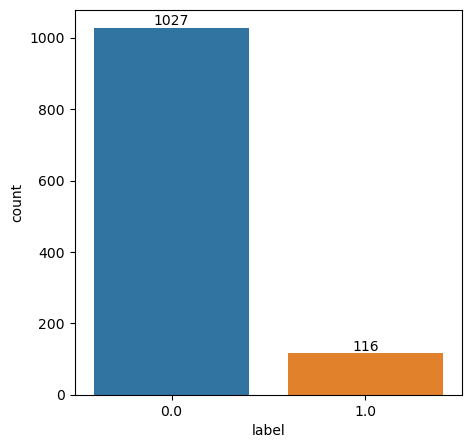

In [281]:
plt.figure(figsize=(5,5))
f=sns.countplot(data_SQL,x='label')
for i in f.containers:
    f.bar_label(i)

It is clear that we have a **imbalanced dataset**

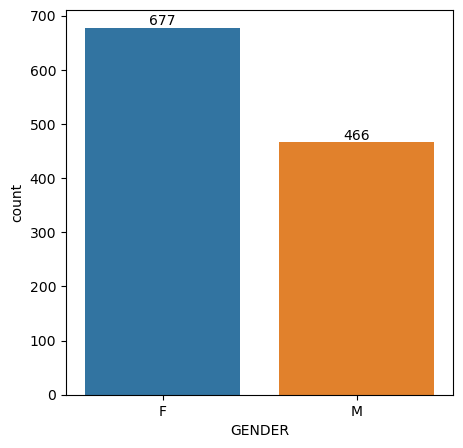

In [283]:
plt.figure(figsize=(5,5))
f=sns.countplot(data_SQL,x='GENDER')
for i in f.containers:
    f.bar_label(i)

We have **more number of females** in the dataset

Percentage wise as well female higher percentage of credit approval from my hypothesis GENDER should not be a factor for credit card approval may be we have some other factors in the dataset

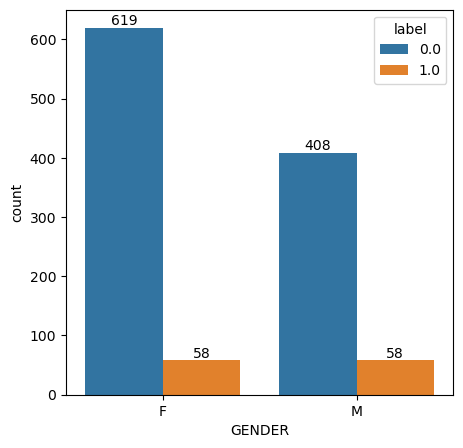

In [287]:
plt.figure(figsize=(5,5))
f=sns.countplot(data_SQL,x='GENDER',hue='label')
for i in f.containers:
    f.bar_label(i)

In [377]:
f=px.box(data_SQL,y='Age',width=500,height=300,color='label',facet_col='GENDER')
f.show()

In Females median age is almost same (40)for approved and non-approved where as in Males it's different(37-Approved) and (44-Non)

In [379]:
f=px.box(data_SQL,y='Annual_income',width=500,height=300,color='label',facet_col='GENDER')
f.show()

From the above plot it's clear that we some outliers in income for Female Approved and male not approved

In [380]:
f=px.box(data_SQL,y='Work_years',width=500,height=300,color='label',facet_col='GENDER')
f.show()

For approval male and fEmale have same median work_years (5+) that means the person has 5 years of work experience, but that seems to be very random as we can see even high work_years haven't got approved

In [382]:
f=px.scatter(data_SQL,y='CHILDREN',x='Family_Members',width=300,height=300)
f.show()

It's almost linera realtionship between CHILDREN and Family_members

In [ ]:
Car_owner and Propet _owner may help in credit card is the null hypothesis

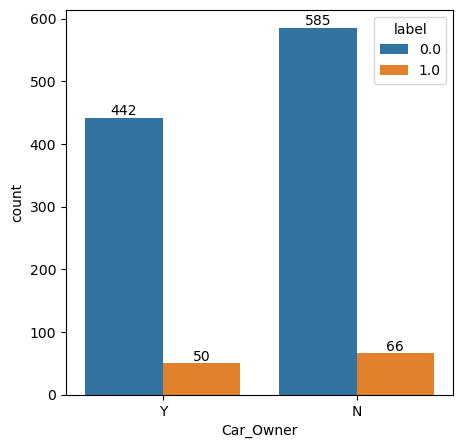

In [358]:
plt.figure(figsize=(5,5))
f=sns.countplot(data_SQL,x='Car_Owner',hue='label')
for i in f.containers:
    f.bar_label(i)

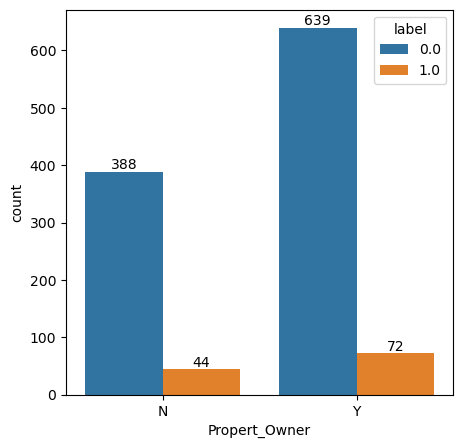

In [359]:
plt.figure(figsize=(5,5))
f=sns.countplot(data_SQL,x='Propert_Owner',hue='label')
for i in f.containers:
    f.bar_label(i)

Null hypothesis is wrong as car_owner has less approved credit card compared not owning

In [ ]:
Credit card approval definitely depends on depemndents as number of dependents increases approval rate should drcrease

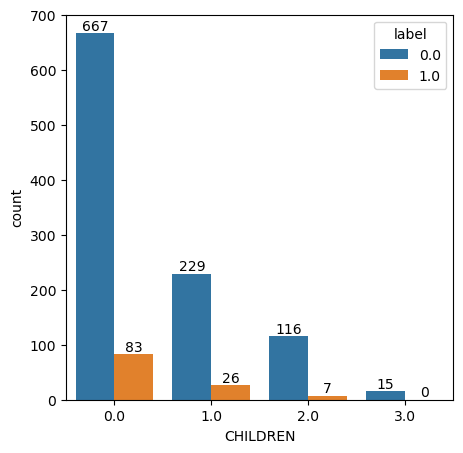

In [321]:
plt.figure(figsize=(5,5))
f=sns.countplot(data_SQL,x='CHILDREN',hue='label')
for i in f.containers:
    f.bar_label(i)

Most credit card were approved with Children 0 that is no dependents, So my hypothesis holds good here.

In [322]:
pd.crosstab(data_SQL['Housing_type'],data_SQL['label'])

label                0.0  1.0
Housing_type                 
Co-op apartment        1    2
House / apartment    914   94
Municipal apartment   26   10
Office apartment       4    2
Rented apartment      14    4
With parents          68    4

In [323]:
pd.crosstab(data_SQL['Marital_status'],data_SQL['label'])

label                 0.0  1.0
Marital_status                
Civil marriage         79    4
Married               731   74
Separated              53    7
Single / not married  142   26
Widow                  22    5

In [357]:
# a=data_SQL.groupby(["Type_Occupation",'label'],as_index=False)["Ind_ID"].count().rename(columns={"Ind_ID":"counts"})
a=data_SQL.groupby(["Type_Occupation",'label'],as_index=False)['GENDER'].count().rename(columns={"GENDER":"counts"})
a['percent']=round(a.counts*100/a.groupby(["Type_Occupation"])["counts"].transform(sum),2)
a.sort_values(by='percent',ascending=False)

Type_Occupation  label  counts  percent
28            Secretaries    0.0       8   100.00
25          Realty agents    0.0       2   100.00
24  Private service staff    0.0      13   100.00
10               HR staff    0.0       3   100.00
13               IT staff    1.0       2   100.00
18               Managers    0.0     102    92.73
20         Medicine staff    0.0      38    92.68
22                 Others    0.0     183    92.42
26            Sales staff    0.0     107    91.45
2          Cleaning staff    0.0      20    90.91
6              Core staff    0.0     135    90.60
11  High skill tech staff    0.0      50    89.29
14               Laborers    0.0     222    88.80
8                 Drivers    0.0      70    88.61
0             Accountants    0.0      33    86.84
31   Waiters/barmen staff    0.0       4    80.00
16     Low-skill Laborers    0.0       7    77.78
4           Cooking staff    0.0      14    77.78
29         Security staff    0.0      16    69.57
30         Security staff    1.0       7    30.43
17     Low-skill Laborers    1.0       2    22.22
5           Cooking staff    1.0       4    22.22
32   Waiters/barmen staff    1.0       1    20.00
1             Accountants    1.0       5    13.16
9                 Drivers    1.0       9    11.39
15               Laborers    1.0      28    11.20
12  High skill tech staff    1.0       6    10.71
7              Core staff    1.0      14     9.40
3          Cleaning staff    1.0       2     9.09
27            Sales staff    1.0      10     8.55
23                 Others    1.0      15     7.58
21         Medicine staff    1.0       3     7.32
19               Managers    1.0       8     7.27

Here it's clear that Managers,Others,Sales_staff,Core_staff more than 90% has been approved,So Others section which were missing cannot be removed from the dataset

In [362]:
a=data_SQL.groupby(["EDUCATION",'label'],as_index=False)["GENDER"].count().rename(columns={"GENDER":"counts"})
a['percent']=round(a.counts*100/a.groupby(["EDUCATION"])["counts"].transform(sum),1)
a['percent']=a['percent'].apply(lambda x: f'{x}%')
print(a)
f=px.bar(a,x="EDUCATION",y="counts",color="label",text="percent")
f.show()

                       EDUCATION  label  counts percent
0                Academic degree    0.0       1  100.0%
1               Higher education    0.0     295   89.7%
2               Higher education    1.0      34   10.3%
3              Incomplete higher    0.0      57   91.9%
4              Incomplete higher    1.0       5    8.1%
5                Lower secondary    0.0       9   64.3%
6                Lower secondary    1.0       5   35.7%
7  Secondary / secondary special    0.0     665   90.2%
8  Secondary / secondary special    1.0      72    9.8%


In [364]:
a=data_SQL.groupby(["Marital_status",'label'],as_index=False)["GENDER"].count().rename(columns={"GENDER":"counts"})
a['percent']=round(a.counts*100/a.groupby(["Marital_status"])["counts"].transform(sum),1)
a['percent']=a['percent'].apply(lambda x: f'{x}%')
print(a)
f=px.bar(a,x="Marital_status",y="counts",color="label",text="percent")
f.show()

         Marital_status  label  counts percent
0        Civil marriage    0.0      79   95.2%
1        Civil marriage    1.0       4    4.8%
2               Married    0.0     731   90.8%
3               Married    1.0      74    9.2%
4             Separated    0.0      53   88.3%
5             Separated    1.0       7   11.7%
6  Single / not married    0.0     142   84.5%
7  Single / not married    1.0      26   15.5%
8                 Widow    0.0      22   81.5%
9                 Widow    1.0       5   18.5%


In [366]:
a=data_SQL.groupby(["Housing_type",'label'],as_index=False)["GENDER"].count().rename(columns={"GENDER":"counts"})
a['percent']=round(a.counts*100/a.groupby(["Housing_type"])["counts"].transform(sum),1)
a['percent']=a['percent'].apply(lambda x: f'{x}%')
print(a)
f=px.bar(a,x="Housing_type",y="counts",color="label",text="percent")
f.show()

           Housing_type  label  counts percent
0       Co-op apartment    0.0       1   33.3%
1       Co-op apartment    1.0       2   66.7%
2     House / apartment    0.0     914   90.7%
3     House / apartment    1.0      94    9.3%
4   Municipal apartment    0.0      26   72.2%
5   Municipal apartment    1.0      10   27.8%
6      Office apartment    0.0       4   66.7%
7      Office apartment    1.0       2   33.3%
8      Rented apartment    0.0      14   77.8%
9      Rented apartment    1.0       4   22.2%
10         With parents    0.0      68   94.4%
11         With parents    1.0       4    5.6%


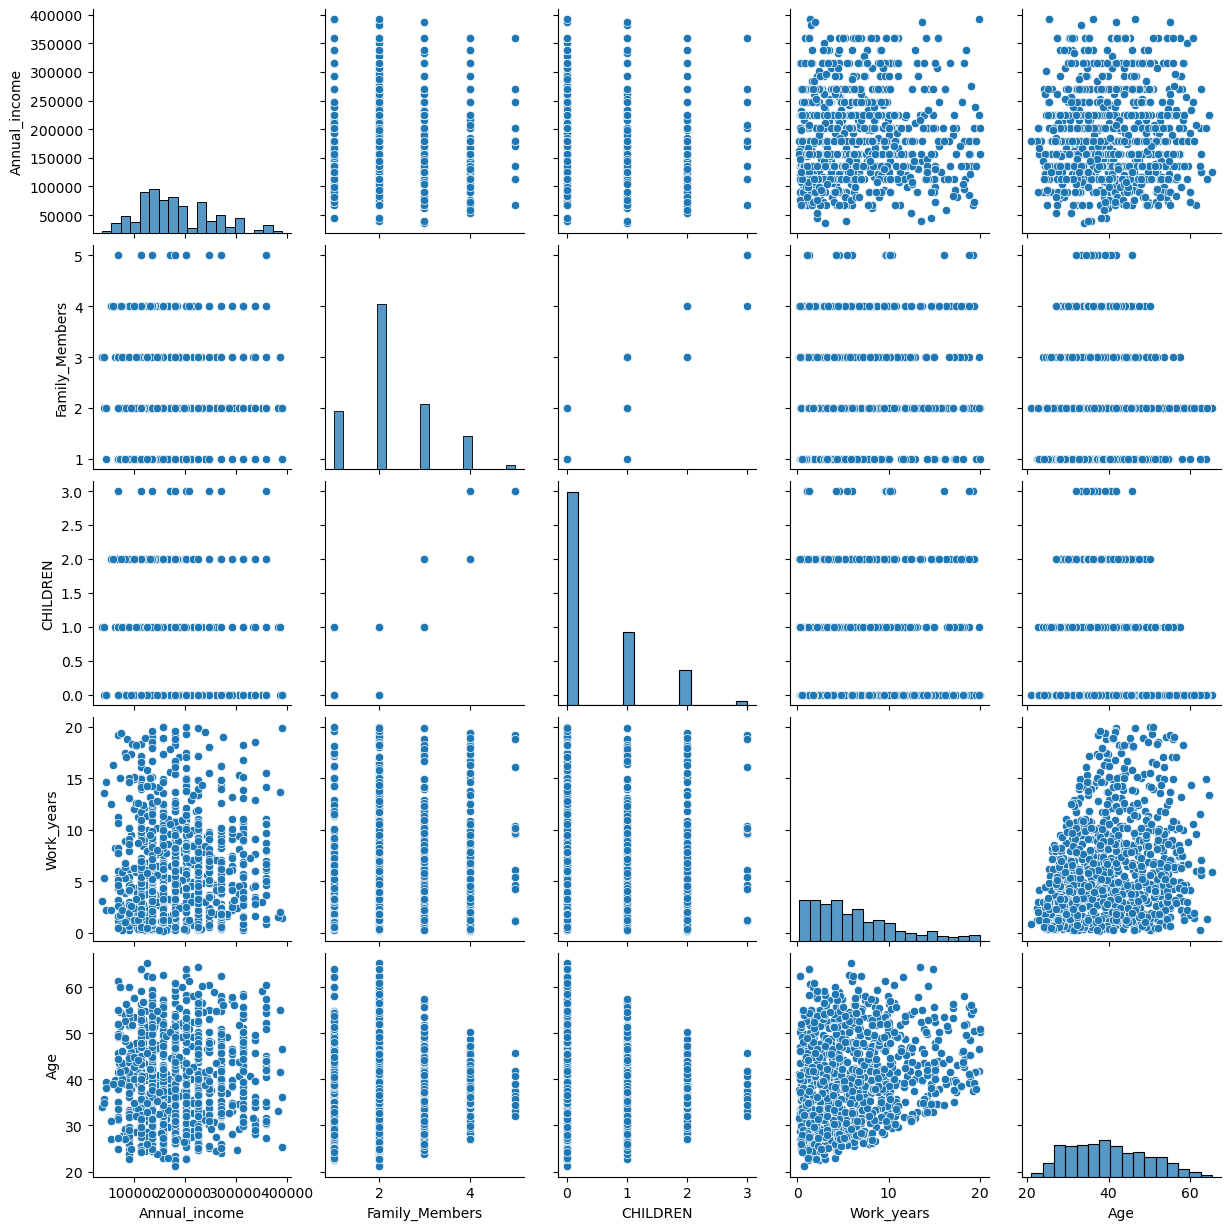

In [181]:
sns.pairplot(data_KNN[['Annual_income','Family_Members','CHILDREN','Work_years','Age']])

It is evident that we have coliinearity between **children and Family_members** so we shall remove one among them.

In [182]:
data_KNN.shape

(1143, 17)

In [184]:
data_KNN1=data_KNN.drop(columns=['Family_Members'],axis=1)
data_KNN1.shape

(1143, 16)

Hence we drop **Family_Members** to remove collinearity

In [185]:
# Examine multicollinearity using VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
   
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = data_KNN1.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(data_KNN1.values, i)
                          for i in range(len(data_KNN1.columns))]
  
print(vif_data)

            feature        VIF
0            GENDER   2.169138
1         Car_Owner   2.044304
2     Propert_Owner   2.769715
3          CHILDREN   1.481643
4     Annual_income   8.971097
5       Type_Income   4.566045
6         EDUCATION   8.742382
7    Marital_status   3.044106
8      Housing_type  24.153070
9        Work_Phone   1.648703
10            Phone   1.721284
11         EMAIL_ID   1.173235
12  Type_Occupation  12.125962
13            label   1.145718
14       Work_years   3.006089
15              Age  17.690026


In [189]:
# Here IAM ALSO REMOVING based on VIF greater than 10 as well
X=data_KNN1.drop(columns=['label','Age','Housing_type','Type_Occupation'],axis=1)
y=data_KNN1['label']
X

GENDER  Car_Owner  Propert_Owner  CHILDREN  Annual_income  Type_Income  \
1        0.0        1.0            0.0       0.0       315000.0          3.0   
2        0.0        1.0            0.0       0.0       315000.0          3.0   
3        0.0        1.0            0.0       0.0       283500.0          3.0   
4        0.0        1.0            0.0       0.0       315000.0          3.0   
6        0.0        1.0            0.0       0.0       315000.0          3.0   
...      ...        ...            ...       ...            ...          ...   
1543     0.0        0.0            1.0       0.0       287100.0          3.0   
1544     0.0        0.0            0.0       0.0       225000.0          3.0   
1545     1.0        1.0            1.0       2.0       180000.0          1.0   
1546     1.0        1.0            0.0       0.0       270000.0          1.0   
1547     0.0        1.0            1.0       0.0       225000.0          1.0   

      EDUCATION  Marital_status  Work_Phone  Phone  EMAIL_ID  Work_years  
1           4.0             1.0         1.0    1.0       0.0        1.61  
2           4.0             1.0         1.0    1.0       0.0        1.61  
3           4.0             1.0         1.0    1.0       0.0        1.61  
4           4.0             1.0         1.0    1.0       0.0        1.61  
6           4.0             1.0         1.0    1.0       0.0        1.61  
...         ...             ...         ...    ...       ...         ...  
1543        4.0             1.0         0.0    0.0       0.0        5.98  
1544        3.0             0.0         0.0    0.0       0.0        3.31  
1545        4.0             1.0         0.0    0.0       0.0        6.79  
1546        2.0             2.0         1.0    1.0       0.0        1.77  
1547        4.0             1.0         0.0    0.0       0.0        7.83  

[1143 rows x 12 columns]

In [190]:
y

1       1.0
2       1.0
3       1.0
4       1.0
6       1.0
       ... 
1543    0.0
1544    0.0
1545    0.0
1546    0.0
1547    0.0
Name: label, Length: 1143, dtype: float64

In [191]:
X.columns

Index(['GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN', 'Annual_income',
       'Type_Income', 'EDUCATION', 'Marital_status', 'Work_Phone', 'Phone',
       'EMAIL_ID', 'Work_years'],
      dtype='object')

# Feature Selection

Since we have alot of features we have eliminate certain features and to find top features we shall try some methods
**Recursive Feature Elimination**

In [201]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=9)
rfe = rfe.fit(X, y)
print(rfe.support_)

print(X.columns)
rfe.ranking_

[ True False  True  True  True  True  True  True  True False False  True]
Index(['GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN', 'Annual_income',
       'Type_Income', 'EDUCATION', 'Marital_status', 'Work_Phone', 'Phone',
       'EMAIL_ID', 'Work_years'],
      dtype='object')


array([1, 3, 1, 1, 1, 1, 1, 1, 1, 4, 2, 1])

In [ ]:
**RandomForestClassifier**

In [204]:
# Feature Importance
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X,y)
importance=model.feature_importances_
importance

array([0.03635469, 0.03706752, 0.04144309, 0.04865857, 0.21101859,
       0.06948114, 0.06620769, 0.06142321, 0.0344645 , 0.03045237,
       0.02335516, 0.34007347])

<Axes: >

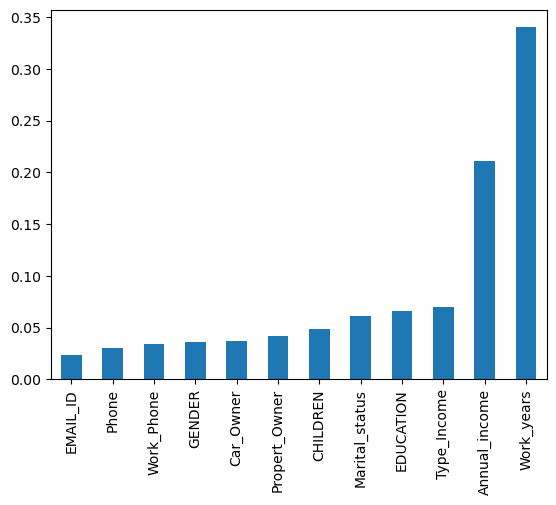

In [208]:
g=pd.Series(importance,index=X.columns).sort_values()
g.plot(kind='bar')

We shall remove **EMAIL_ID and Phone** as they tend to be low -priority from both feature selection techniques

In [209]:
x=X.drop(columns=['EMAIL_ID','Phone'],axis=1)
x.columns

Index(['GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN', 'Annual_income',
       'Type_Income', 'EDUCATION', 'Marital_status', 'Work_Phone',
       'Work_years'],
      dtype='object')

In [282]:
y

1       1.0
2       1.0
3       1.0
4       1.0
6       1.0
       ... 
1543    0.0
1544    0.0
1545    0.0
1546    0.0
1547    0.0
Name: label, Length: 1143, dtype: float64

# Split the data

In [210]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.3,random_state=42)
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(800, 10)
(800,)
(343, 10)
(343,)


In [211]:
xtrain

GENDER  Car_Owner  Propert_Owner  CHILDREN  Annual_income  Type_Income  \
669      0.0        1.0            0.0       2.0       315000.0          1.0   
586      0.0        0.0            0.0       1.0       112500.0          3.0   
1250     1.0        1.0            0.0       2.0       225000.0          3.0   
1103     0.0        1.0            1.0       1.0       180000.0          1.0   
844      1.0        1.0            1.0       0.0       180000.0          1.0   
...      ...        ...            ...       ...            ...          ...   
1415     0.0        1.0            1.0       0.0       157500.0          3.0   
1488     0.0        1.0            1.0       1.0       270000.0          1.0   
1534     1.0        1.0            1.0       0.0       180000.0          3.0   
1165     0.0        0.0            0.0       0.0       112500.0          3.0   
1529     1.0        1.0            1.0       0.0       225000.0          3.0   

      EDUCATION  Marital_status  Work_Phone  Work_years  
669         2.0             1.0         0.0       10.39  
586         4.0             1.0         1.0        6.94  
1250        2.0             1.0         0.0       10.55  
1103        4.0             3.0         0.0       16.39  
844         2.0             1.0         0.0        6.64  
...         ...             ...         ...         ...  
1415        4.0             0.0         0.0        3.12  
1488        2.0             1.0         0.0        8.89  
1534        2.0             1.0         0.0        9.52  
1165        3.0             1.0         0.0        6.41  
1529        4.0             0.0         0.0        5.90  

[800 rows x 10 columns]

In [212]:
ytrain

669     0.0
586     0.0
1250    0.0
1103    0.0
844     0.0
       ... 
1415    0.0
1488    0.0
1534    0.0
1165    0.0
1529    0.0
Name: label, Length: 800, dtype: float64

# Scaling the data

In [213]:
from sklearn.preprocessing import MinMaxScaler
m=MinMaxScaler()
xtrain=m.fit_transform(xtrain)
xtrain

array([[0.        , 1.        , 0.        , ..., 0.25      , 0.        ,
        0.51542742],
       [0.        , 0.        , 0.        , ..., 0.25      , 1.        ,
        0.34092059],
       [1.        , 1.        , 0.        , ..., 0.25      , 0.        ,
        0.52352049],
       ...,
       [1.        , 1.        , 1.        , ..., 0.25      , 0.        ,
        0.47142135],
       [0.        , 0.        , 0.        , ..., 0.25      , 0.        ,
        0.31411229],
       [1.        , 1.        , 1.        , ..., 0.        , 0.        ,
        0.28831563]])

In [214]:
xtest=m.fit_transform(xtest)
xtest

array([[0.        , 0.        , 1.        , ..., 0.75      , 0.        ,
        0.20070958],
       [1.        , 0.        , 1.        , ..., 0.25      , 0.        ,
        0.00202737],
       [1.        , 1.        , 1.        , ..., 0.25      , 0.        ,
        0.36036493],
       ...,
       [0.        , 0.        , 0.        , ..., 0.25      , 1.        ,
        0.03091738],
       [0.        , 0.        , 1.        , ..., 0.25      , 1.        ,
        0.41713127],
       [1.        , 0.        , 1.        , ..., 0.5       , 0.        ,
        0.5478966 ]])

In [255]:
from sklearn import metrics
from sklearn.metrics import accuracy_score , classification_report, ConfusionMatrixDisplay,precision_score,recall_score, f1_score

In [219]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [225]:
models={
    "Logisitic Regression" :LogisticRegression(max_iter=20000),
    "Decision Tree" :DecisionTreeClassifier(),
    "Random Forest":RandomForestClassifier(),
    "Support Vector Machine": svm.SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=3)}

list(models)

['Logisitic Regression',
 'Decision Tree',
 'Random Forest',
 'Support Vector Machine',
 'K-Nearest Neighbors']

In [245]:
list(models.values())[0]

LogisticRegression(max_iter=20000)

In [254]:
for i in range(len(list(models))):
    ml=list(models.values())[i]   #calling each model and naming them as ml
    
    ml.fit(xtrain,ytrain)#     fit and train them using training dataset
    
    #     We have to make predictions 
    train_pred=ml.predict(xtrain) # based on training data
    test_pred=ml.predict(xtest) # based on test data
    
    # Let's analyze prediction performance with metrices
    #Performance of test_set
    test_accuracy=accuracy_score(ytest,test_pred)
    test_f1=f1_score(ytest,test_pred,average='weighted')
    test_precision=precision_score(ytest,test_pred,average='weighted')
    test_recall=recall_score(ytest,test_pred,average='weighted')
    
    #Performance of train_set
    train_accuracy=accuracy_score(ytrain,train_pred)
    train_f1=f1_score(ytrain,train_pred,average='weighted')
    train_precision=precision_score(ytrain,train_pred,average='weighted')
    train_recall=recall_score(ytrain,train_pred,average='weighted')
    
    print(list(models.keys())[i])
    print("*"*30)
    
    print('Model performance for Training set')
    print("- Accuracy: {:.2f}".format(train_accuracy))
    print('- F1 score: {:2f}'.format(train_f1))
    print('- Precision: {:2f}'.format(train_precision))
    print('- Recall: {:2f}'.format(train_recall))

    print('----------------------------------')

    print('Model performance for Test set')
    print('- Accuracy: {:.2f}'.format(test_accuracy) )
    print('- Fl score: {:.2f}'.format(test_f1))
    print('- Precision: {:.2f}'.format(test_precision))
    print('- Recall: {:.2f}'.format(test_recall))
    
    print('='*30)
    print('\n')


C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Logisitic Regression
******************************
Model performance for Training set
- Accuracy: 0.91
- F1 score: 0.859869
- Precision: 0.819025
- Recall: 0.905000
----------------------------------
Model performance for Test set
- Accuracy: 0.88
- Fl score: 0.83
- Precision: 0.78
- Recall: 0.88


Decision Tree
******************************
Model performance for Training set
- Accuracy: 0.99
- F1 score: 0.993768
- Precision: 0.993795
- Recall: 0.993750
----------------------------------
Model performance for Test set
- Accuracy: 0.86
- Fl score: 0.85
- Precision: 0.85
- Recall: 0.86


Random Forest
******************************
Model performance for Training set
- Accuracy: 0.99
- F1 score: 0.993804
- Precision: 0.993935
- Recall: 0.993750
----------------------------------
Model performance for Test set
- Accuracy: 0.91
- Fl score: 0.89
- Precision: 0.90
- Recall: 0.91


Support Vector Machine
******************************
Model performance for Training set
- Accuracy: 0.91
- F1 

C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Here Decision tree and Random forest is showing overfitting rest of the model shows good behaviour..
Since we have imbalanced dataset we will do SMOTE 

In [385]:
# installing imbalanced-learn and imported SMOTE
pip install imbalanced-learn

In [392]:
from imblearn.over_sampling import SMOTE
sl=SMOTE()

In [388]:
x

GENDER  Car_Owner  Propert_Owner  CHILDREN  Annual_income  Type_Income  \
1        0.0        1.0            0.0       0.0       315000.0          3.0   
2        0.0        1.0            0.0       0.0       315000.0          3.0   
3        0.0        1.0            0.0       0.0       283500.0          3.0   
4        0.0        1.0            0.0       0.0       315000.0          3.0   
6        0.0        1.0            0.0       0.0       315000.0          3.0   
...      ...        ...            ...       ...            ...          ...   
1543     0.0        0.0            1.0       0.0       287100.0          3.0   
1544     0.0        0.0            0.0       0.0       225000.0          3.0   
1545     1.0        1.0            1.0       2.0       180000.0          1.0   
1546     1.0        1.0            0.0       0.0       270000.0          1.0   
1547     0.0        1.0            1.0       0.0       225000.0          1.0   

      EDUCATION  Marital_status  Work_Phone  Work_years  
1           4.0             1.0         1.0        1.61  
2           4.0             1.0         1.0        1.61  
3           4.0             1.0         1.0        1.61  
4           4.0             1.0         1.0        1.61  
6           4.0             1.0         1.0        1.61  
...         ...             ...         ...         ...  
1543        4.0             1.0         0.0        5.98  
1544        3.0             0.0         0.0        3.31  
1545        4.0             1.0         0.0        6.79  
1546        2.0             2.0         1.0        1.77  
1547        4.0             1.0         0.0        7.83  

[1143 rows x 10 columns]

In [389]:
y

1       1.0
2       1.0
3       1.0
4       1.0
6       1.0
       ... 
1543    0.0
1544    0.0
1545    0.0
1546    0.0
1547    0.0
Name: label, Length: 1143, dtype: float64

In [390]:
y.value_counts()

0.0    1027
1.0     116
Name: label, dtype: int64

In [393]:
xsmote,ysmote=sl.fit_resample(x,y)

In [394]:
ysmote.value_counts()

1.0    1027
0.0    1027
Name: label, dtype: int64

We could see that minority value which was 1 got increased in numbers

In [405]:
xstrain,xstest,ystrain,ystest=train_test_split(xsmote,ysmote,test_size=0.3,random_state=101)
print(xstrain.shape)
print(ystrain.shape)
print(xstest.shape)
print(ystest.shape)

(1437, 10)
(1437,)
(617, 10)
(617,)


In [406]:
from sklearn.preprocessing import MinMaxScaler
m=MinMaxScaler()
xstrain=m.fit_transform(xstrain)
xstrain

array([[0.10213799, 1.        , 0.10213799, ..., 0.25      , 0.89786201,
        0.04061793],
       [1.        , 1.        , 1.        , ..., 0.25      , 1.        ,
        0.50177036],
       [1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.06019221],
       ...,
       [0.78512942, 1.        , 0.21487058, ..., 0.05371764, 0.21487058,
        0.12061736],
       [1.        , 1.        , 1.        , ..., 0.25      , 0.        ,
        0.45624684],
       [0.        , 0.        , 0.        , ..., 0.25      , 1.        ,
        0.96155792]])

In [407]:
xstest=m.fit_transform(xstest)
xstest

array([[0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.06917599],
       [0.28278898, 1.        , 0.28278898, ..., 0.25      , 0.71721102,
        0.09643884],
       [1.        , 1.        , 0.03569709, ..., 0.25      , 0.03569709,
        0.13757122],
       ...,
       [1.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.41861648],
       [1.        , 1.        , 0.        , ..., 0.25      , 0.        ,
        0.10834181],
       [1.        , 1.        , 1.        , ..., 0.25      , 0.        ,
        0.95066124]])

In [408]:
models={
    "Logisitic Regression" :LogisticRegression(max_iter=20000),
    "Decision Tree" :DecisionTreeClassifier(),
    "Random Forest":RandomForestClassifier(),
    "Support Vector Machine": svm.SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=3)}
for i in range(len(list(models))):
    ml=list(models.values())[i]   #calling each model and naming them as ml
    
    ml.fit(xstrain,ystrain)#     fit and train them using training dataset
    
    #     We have to make predictions 
    smote_train_pred=ml.predict(xstrain) # based on training data
    smote_test_pred=ml.predict(xstest) # based on test data
    
    # Let's analyze prediction performance with metrices
    #Performance of test_set
    smote_test_accuracy=accuracy_score(ystest,smote_test_pred)
    smote_test_f1=f1_score(ystest,smote_test_pred,average='weighted')
    smote_test_precision=precision_score(ystest,smote_test_pred,average='weighted')
    smote_test_recall=recall_score(ystest,smote_test_pred,average='weighted')
    
    #Performance of train_set
    smote_train_accuracy=accuracy_score(ystrain,smote_train_pred)
    smote_train_f1=f1_score(ystrain,smote_train_pred,average='weighted')
    smote_train_precision=precision_score(ystrain,smote_train_pred,average='weighted')
    smote_train_recall=recall_score(ystrain,smote_train_pred,average='weighted')
    
    print(list(models.keys())[i])
    print("*"*30)
    
    print('Model performance for Training set')
    print("- Accuracy: {:.2f}".format(smote_train_accuracy))
    print('- F1 score: {:2f}'.format(smote_train_f1))
    print('- Precision: {:2f}'.format(smote_train_precision))
    print('- Recall: {:2f}'.format(smote_train_recall))

    print('----------------------------------')

    print('Model performance for Test set')
    print('- Accuracy: {:.2f}'.format(smote_test_accuracy) )
    print('- Fl score: {:.2f}'.format(smote_test_f1))
    print('- Precision: {:.2f}'.format(smote_test_precision))
    print('- Recall: {:.2f}'.format(smote_test_recall))
    
    print('='*30)
    print('\n')

Logisitic Regression
******************************
Model performance for Training set
- Accuracy: 0.63
- F1 score: 0.631202
- Precision: 0.634195
- Recall: 0.632568
----------------------------------
Model performance for Test set
- Accuracy: 0.63
- Fl score: 0.63
- Precision: 0.63
- Recall: 0.63


Decision Tree
******************************
Model performance for Training set
- Accuracy: 1.00
- F1 score: 0.995129
- Precision: 0.995130
- Recall: 0.995129
----------------------------------
Model performance for Test set
- Accuracy: 0.80
- Fl score: 0.80
- Precision: 0.81
- Recall: 0.80


Random Forest
******************************
Model performance for Training set
- Accuracy: 1.00
- F1 score: 0.995129
- Precision: 0.995153
- Recall: 0.995129
----------------------------------
Model performance for Test set
- Accuracy: 0.95
- Fl score: 0.95
- Precision: 0.95
- Recall: 0.95


Support Vector Machine
******************************
Model performance for Training set
- Accuracy: 0.86
- F1 

Even after SMOTE Decision Tree and RandomForest kind of Overfitting, Where other machine learning models are good enough like SVM,Logistic Regression

So here we have trained several models in that we have seen certain models overfit while others perform better. Hence we shall choose any model that performs better here (SVM or Logistic) and use the same for credit card approval.
